# Question 1

In [1]:
import numpy as np
import math
import pylab as pl
import random
import matplotlib.pyplot as plt
from time import time
from sklearn import linear_model
%matplotlib inline


In [2]:
def sigmoid(x):
  return (1 / (1 + math.exp(-x)))


In [3]:
# Read the data file

data = pl.loadtxt('../DataFiles/HW2/data1_train.csv')
len(data[:,2])
Y = data[:,2]
X = data[:,0:2]
a=np.array([1.0]*len(Y))

#np.c_[a, X]
#range(Y.shape[0])


In [4]:
# Assuming y's are +1 and -1 
def logisticRegression(weight,X,Y,lambda_shrink):
    """
    Function return the negative log-likelihood(NLL) and gradient for the NLL
    based on the likelihood for logistic regression. Inputs are X,Y, weights for
    the logistic regression and shrinkage parameter for penalization
    
    """
    
    
    W = weight[1:]
    bias = weight[0]

    NLL = 0
    NLL_interceptGrad = 0
    NLL_weightGrad = [0]*len(W)
    print Y
    samples = len(Y)
    
    for i in range(samples):
        # Update for each sample
        interm =np.exp(-Y[i]*(np.dot(W,X[i,:])+bias))
        NLL+=math.log(1+interm)
        NLL_interceptGrad+=(-Y[i]*interm)/(1+interm)
        pointGradient = (X[i,]*(-Y[i]*interm))/(1+interm)
        NLL_weightGrad = [i+j for i,j in zip(NLL_weightGrad,pointGradient)]
    
   
    
    L2normSq = np.inner(W,np.transpose(W))
    
    shrinkage = lambda_shrink * L2normSq
    value = NLL+shrinkage
    
    
    NLLGrad = np.append(NLL_interceptGrad,[NLL_weightGrad])
    shrinkGradient = [0]+ [2*lambda_shrink*a for a in W] # add zero in the beginning for the intercept
    Gradient = [a+b for a,b in  zip(NLLGrad,shrinkGradient)]

    return(value,Gradient)


In [5]:
def logisticRegressionSGD(weight,X,Y,lambda_shrink):
    """
    Function return the negative log-likelihood(NLL) and gradient for the NLL
    based on the likelihood for logistic regression. Inputs are X,Y, weights for
    the logistic regression and shrinkage parameter for penalization
    (The difference here this is done in matrix calculation)
    
    """
    
    W = weight[1:]
    bias = weight[0]

    interm =np.exp(-Y*(np.dot(W,X)+bias))
    NLL = math.log(1+interm)
    NLL_interceptGrad = (1/(1+interm))*-Y*interm
    NLL_weightGrad = (1/(1+interm))*interm*-Y*X
    
    L2normSq = np.inner(W,np.transpose(W))
    shrinkage = lambda_shrink * L2normSq
    value = NLL+shrinkage

    NLLGrad = np.append(NLL_interceptGrad,[NLL_weightGrad])
    shrinkGradient = [0]+ [2*lambda_shrink*a for a in W]
    #print shrinkGradient
    Gradient = [a+b for a,b in  zip(NLLGrad,shrinkGradient)]

    return(value,Gradient)

In [6]:
logisticRegressionSGD([2,1,3],np.array([1,2]),np.array([1]),0)

(0.00012340218972333965,
 [-0.00012339457598623172, -0.00012339457598623172, -0.00024678915197246345])

In [7]:
print X[0,:]
print Y[0]
print logisticRegressionSGD([0,0,1],X[0,:],Y[0],0)
print logisticRegressionSGD([0,0,1],X[0,:],Y[0],1)

[-1.38996032  1.79306652]
1.0
(0.1539640633647761, [-0.1426971709630708, 0.19834340470720818, -0.25586551923848427])
(1.153964063364776, [-0.1426971709630708, 0.19834340470720818, 1.7441344807615158])


In [8]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    errorPropagation = []
    iteration = 0
    
    while epsilon > threshold and iteration < maxIter : 
        if iteration==0:
            
            value = [float(i) for i in initGuess]
        
        output = function(value,*args)
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        gradient = [float(i) for i in output[1]]
        change = [a*step for a in gradient]
        newValue = [a - b for a,b in zip(value,change)] #GDS equation
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        epsilon = abs(evaluateNew - evaluateOld)
        
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm.append(gNorm)
        
        errorPropagation.append(epsilon)
        iteration+=1
            
    return(gradientNorm, errorPropagation,value,iteration)

In [9]:

def stochasticGradientDiscent(function,initGuess,threshold,maxIter,tau0,kappa,*args):
    """
         Genereic stochastic gradient descent function that outputs the point estimate
         and the norm
    """
    
    gradientNorm = []
    epsilon = 1
    k = kappa
    
    steps = 0
    iteration = 0
    X = args[0]
    Y = args[1]
    c = args[2]
    n = X.shape[0]
    print n
    print maxIter 
    ConvergedTheta  = []

    weightList = []

    for j in range(maxIter): 
        #print indTheta
        for i in range(n):
            #print i
            if epsilon > threshold:
                
                indX = X[i,]
                indY = Y[i]
                
                if steps ==0:
                    indTheta = initGuess
          
                output = function(indTheta,indX,indY,c)

                value = output[0]
                gradient = output[1]
                etaT = (1./((tau0+steps)*np.linalg.norm(gradient)))**k
                change = [a*etaT for a in gradient]
                newTheta = [a - b for a,b in zip(indTheta,change)] #GDS equation
                newValue = function(newTheta,indX,indY,c)[0]
                epsilon = np.linalg.norm(function(newTheta,indX,indY,c)[1])

                steps= steps +1            
                indTheta = newTheta
                gradientNorm.append(np.linalg.norm(gradient))

                ConvergedTheta = indTheta
                weightList.append(indTheta)
 
                
            else:
                print "SGD converged"
                break
    return(indTheta,gradientNorm,weightList)

In [10]:
def sGD(func, initGuess, iters, truth, X,y, tau, kappa,c):
    gradientNorm=[]
    percError = []
    guess = initGuess
    gNorm = 1
    iteration = 0
    sample = 0
    perc_err=100
    for i in range(iters):
        #Evaluate function at current guess and sample
        output = func(guess,X[sample], y[sample],c)         
        #find gradient at current guess and sample
        gradient = output[1]
        step = 1/(tau + iteration + abs(np.linalg.norm(gradient)))**kappa

        #calculate new guess
        guess_new = guess - step * gradient 
        #find epsilon, distance between old and new function values on FULL DATA
        epsilon = abs(func(guess_new,X,y)[0] - func(guess,X,y)[0])
        #update guess
        guess = guess_new

        
        gradient= func(guess,X,y)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm.append(gNorm)
        
        percError.append(np.linalg.norm(guess_new-theta_hatOLS)/np.linalg.norm(theta_hatOLS)*100)
        #print(iteration, gNorm)
        
        iteration=iteration+1
        if sample == len(y)-1:
            sample=0
        else: sample = sample +1
    return(gNorm, guess, iteration, gradientNorm, percError)

In [11]:
#sGD(logisticRegressionSGD,np.array([0,0,0]),10,5,X,Y,5,0.6,1)

In [12]:
result_array = np.empty((0, 3))
result_array=np.append(result_array,[[1,2,3]],axis=0)
result_array=np.append(result_array,[[41,22,3]],axis=0)


In [13]:
# From python implementation
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit0 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=100000000, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

# Check the answer for part (a) via sklearn implementation 
a = logit.fit(X,Y)
print a.intercept_,a.coef_
b = logit0.fit(X,Y)
print b.intercept_,b.coef_

[ 1.13829764] [[-0.18293729  3.36791697]]
[ 6.15190321] [[ -1.21605589  11.73487733]]


In [14]:
# Applying stochastic gradient discent
A_lambda_1 = stochasticGradientDiscent(logisticRegressionSGD,[0,0,0],1e-5,1,15,0.6,X,Y,1)
A_lambda_0 = stochasticGradientDiscent(logisticRegressionSGD,[0,0,0],1e-5,1,15,0.6,X,Y,0)

400
1
400
1
SGD converged


In [15]:
np.array(A_lambda_1[2])[190:210,1]

array([-0.062569  , -0.07660803, -0.05147647, -0.01692771, -0.04891728,
       -0.08496765, -0.10768295, -0.06755881, -0.09316883, -0.05809887,
       -0.02844807, -0.06028817, -0.0228533 ,  0.01438341, -0.01319293,
       -0.03614786, -0.06702887, -0.03505633, -0.00390237, -0.03412634])

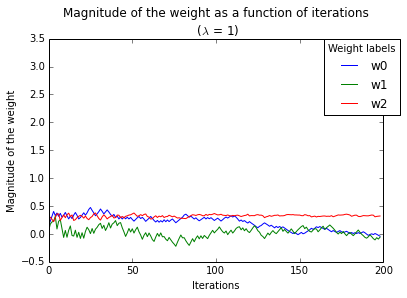

In [16]:
plt.plot(np.array(A_lambda_1[2])[1:200,0],label ='w0' )
plt.plot(np.array(A_lambda_1[2])[1:200,1],label = 'w1')
plt.plot(np.array(A_lambda_1[2])[1:200,2],label = 'w2')

plt.xlabel('Iterations')
plt.ylabel('Magnitude of the weight')
plt.ylim(-0.5,3.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Weight labels")
plt.title('Magnitude of the weight as a function of iterations \n ($\lambda$ = 1)')
pl.savefig('../ImageFiles/HW2/Q1.1_lambda=1.pdf')


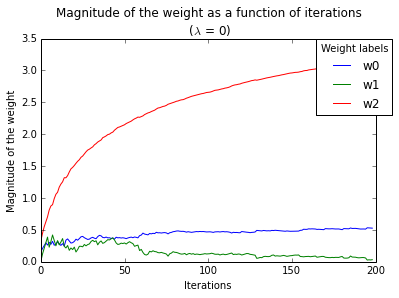

In [17]:
plt.plot(np.array(A_lambda_0[2])[1:200,0],label ='w0' )
plt.plot(np.array(A_lambda_0[2])[1:200,1],label = 'w1')
plt.plot(np.array(A_lambda_0[2])[1:200,2],label = 'w2')
plt.xlabel('Iterations')
plt.ylabel('Magnitude of the weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Weight labels")
plt.title('Magnitude of the weight as a function of iterations \n ($\lambda$ = 0)')
pl.savefig('../ImageFiles/HW2/Q1.1_lambda=0.pdf')

In [18]:
# L1 regularization


In [19]:
print Coefficients_L1
print TotItrations_L1

NameError: name 'Coefficients_L1' is not defined

# 1.2 L1 Norm

In [177]:
# sklearn logistic regression
# Use lambda of 0,0.1,1,5. C is the inverse of lambda 
# Use both L1 and L2 regularization
# In order for there to be no regularization choose C to be a very large number
from sklearn import linear_model
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=10000000, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

In [178]:
data = pl.loadtxt('../DataFiles/HW2/data1_train.csv')

Y = data[:,2]
X = data[:,0:2]

data1_V = pl.loadtxt('../DataFiles/HW2/data1_validate.csv')
Y_V = data1_V[:,2]
X_V = data1_V[:,0:2]



data1_Test = pl.loadtxt('../DataFiles/HW2/data1_test.csv')
Y_Test = data1_Test[:,2]
X_Test = data1_Test[:,0:2]



In [179]:
print len(Y)
print len(Y_V)
print len(Y_Test)

400
200
200


In [180]:
data2 = pl.loadtxt('../DataFiles/HW2/data2_train.csv')

Y2 = data2[:,2]
X2 = data2[:,0:2]

data2_V = pl.loadtxt('../DataFiles/HW2/data2_validate.csv')
Y2_V = data2_V[:,2]
X2_V = data2_V[:,0:2]


data2_Test = pl.loadtxt('../DataFiles/HW2/data2_test.csv')
Y2_Test = data2_Test[:,2]
X2_Test = data2_Test[:,0:2]

print len(Y2)
print len(Y2_V)
print len(Y2_Test)

400
200
200


In [181]:
data3 = pl.loadtxt('../DataFiles/HW2/data3_train.csv')

Y3 = data3[:,2]
X3 = data3[:,0:2]
a=np.array([1.0]*len(Y))

data3_V = pl.loadtxt('../DataFiles/HW2/data3_validate.csv')
Y3_V = data3_V[:,2]
X3_V = data3_V[:,0:2]


data3_Test = pl.loadtxt('../DataFiles/HW2/data3_test.csv')
Y3_Test = data3_Test[:,2]
X3_Test = data3_Test[:,0:2]

print len(Y3)
print len(Y3_V)
print len(Y3_Test)

400
200
200


In [182]:
data4 = pl.loadtxt('../DataFiles/HW2/data4_train.csv')
Y4 = data4[:,2]
X4 = data4[:,0:2]
a=np.array([1.0]*len(Y))


data4_V = pl.loadtxt('../DataFiles/HW2/data4_validate.csv')
Y4_V = data4_V[:,2]
X4_V = data4_V[:,0:2]


data4_Test = pl.loadtxt('../DataFiles/HW2/data4_test.csv')
Y4_Test = data4_Test[:,2]
X4_Test = data4_Test[:,0:2]

print len(Y4)
print len(Y4_V)
print len(Y4_Test)

400
400
400


In [183]:
Y4_V.shape

(400,)

In [184]:
def ClassError(A,B):
    
    """ Function to calculate the classification error"""
    error = 0
    for i in range(len(A)):
        if A[i] != B[i]:
            error+=1
    return error

In [185]:
logit_0 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=10000000, fit_intercept=True,
                                          intercept_scaling=1, max_iter=10000, multi_class='ovr')
logit_0_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=10, fit_intercept=True, 
                                            intercept_scaling=1, max_iter=10000, multi_class='ovr')
logit_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                          intercept_scaling=1, max_iter=10000, multi_class='ovr')
logit_5 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=0.2, fit_intercept=True, 
                                          intercept_scaling=1, max_iter=10000, multi_class='ovr')


In [186]:
# Effect of lambda on weights, decision boundary, and classification error rate 
# For training set 1



model_0_set1 = logit_0.fit(X,Y)
print model_0_set1.coef_,model_0_set1.intercept_
print ClassError(Y,model_0_set1.predict(X))
print ClassError(Y_V,model_0_set1.predict(X_V))

print '--------------'
model_0_set2 = logit_0.fit(X2,Y2)
print model_0_set2.coef_,model_0_set2.intercept_
print ClassError(Y2,model_0_set2.predict(X2))
print ClassError(Y2_V,model_0_set2.predict(X2_V))


print '--------------'
model_0_set3 = logit_0.fit(X3,Y3)
print model_0_set3.coef_,model_0_set3.intercept_
print ClassError(Y3,model_0_set3.predict(X3))
print ClassError(Y3_V,model_0_set3.predict(X3_V))

print '--------------'
model_0_set4 = logit_0.fit(X4,Y4)
print model_0_set4.coef_,model_0_set4.intercept_
#print sum(abs(Y4 - model_0_set4.predict(X4)))
#print sum(abs(Y4_V - model_0_set4.predict(X4_V)))
#model_0_set1.coef_
print ClassError(Y4,model_0_set4.predict(X4))
print ClassError(Y4_V,model_0_set4.predict(X4_V))

[[ -1.21604045  11.73473535]] [ 6.15181078]
0
0
--------------
[[ 1.82486765  0.00233099]] [ 0.18261812]
68
35
--------------
[[ -0.45997313  13.61612131]] [-6.63692952]
5
7
--------------
[[-0.02473662 -0.02372561]] [ 0.00059689]
194
203


In [187]:
model_0_1_set1 = logit_0_1.fit(X,Y)
print model_0_1_set1.coef_,model_0_1_set1.intercept_

print ClassError(Y,model_0_1_set1.predict(X))
print ClassError(Y_V,model_0_1_set1.predict(X_V))


print '-----------------'

model_0_1_set2 = logit_0_1.fit(X2,Y2)
print model_0_1_set2.coef_,model_0_set2.intercept_
print ClassError(Y2,model_0_1_set2.predict(X2))
print ClassError(Y2_V,model_0_1_set2.predict(X2_V))

print '-----------------'

model_0_1_set3 = logit_0_1.fit(X3,Y3)
print model_0_1_set3.coef_,model_0_1_set3.intercept_
print ClassError(Y3,model_0_1_set3.predict(X3))
print ClassError(Y3_V,model_0_1_set3.predict(X3_V))

print '-----------------'

model_0_1_set4 = logit_0_1.fit(X4,Y4)
print model_0_1_set4.coef_,model_0_1_set4.intercept_
print ClassError(Y4,model_0_1_set4.predict(X4))
print ClassError(Y4_V,model_0_1_set4.predict(X4_V))

[[-0.46420343  5.30635537]] [ 2.37552442]
0
0
-----------------
[[ 1.81888558  0.00221756]] [ 0.00059689]
68
35
-----------------
[[-0.30901382  8.72763494]] [-3.76774254]
5
7
-----------------
[[-0.02473148 -0.02372077]] [ 0.00059616]
194
203


In [188]:
model_1_set1 = logit_1.fit(X,Y)
print model_1_set1.coef_,model_1_set1.intercept_
print ClassError(Y,model_1_set1.predict(X))
print ClassError(Y_V,model_1_set1.predict(X_V))

print '-----------------'

model_1_set2 = logit_1.fit(X2,Y2)
print model_1_set2.coef_,model_1_set2.intercept_
print ClassError(Y2,model_1_set2.predict(X2))
print ClassError(Y2_V,model_1_set2.predict(X2_V))

print '-----------------'

model_1_set3 = logit_1.fit(X3,Y3)
print model_1_set3.coef_,model_1_set3.intercept_
print ClassError(Y3,model_1_set3.predict(X3))
print ClassError(Y3_V,model_1_set3.predict(X3_V))

print '-----------------'

model_1_set4 = logit_1.fit(X4,Y4)
print model_1_set4.coef_,model_1_set4.intercept_
print ClassError(Y4,model_1_set4.predict(X4))
print ClassError(Y4_V,model_1_set4.predict(X4_V))

[[-0.18293729  3.36791697]] [ 1.13829764]
0
0
-----------------
[[  1.76833368e+00   1.24387569e-03]] [ 0.1689112]
67
35
-----------------
[[-0.20814065  4.8715839 ]] [-1.50894762]
9
6
-----------------
[[-0.02468524 -0.02367728]] [ 0.00058969]
194
203


In [176]:
model_5_set1 = logit_5.fit(X,Y)
print model_5_set1.coef_,model_5_set1.intercept_
print ClassError(Y,model_5_set1.predict(X))
print ClassError(Y_V,model_5_set1.predict(X_V))

print '-----------------'

model_5_set2 = logit_5.fit(X2,Y2)
print model_5_set2.coef_,model_5_set2.intercept_
print ClassError(Y2,model_5_set2.predict(X2))
print ClassError(Y2_V,model_5_set2.predict(X2_V))

print '-----------------'


model_5_set3 = logit_5.fit(X3,Y3)
print model_5_set3.coef_,model_5_set3.intercept_
print ClassError(Y3,model_5_set3.predict(X3))
print ClassError(Y3_V,model_5_set3.predict(X3_V))

print '-----------------'

model_5_set4 = logit_5.fit(X4,Y4)
print model_5_set4.coef_,model_5_set4.intercept_
print ClassError(Y4,model_5_set4.predict(X4))
print ClassError(Y4_V,model_5_set4.predict(X4_V))

NameError: name 'logit_5' is not defined

In [367]:
# Conclusion from L2 regularization the lowest classification error was obtained 
# dataset 1 - 97 across all lambdas
# dataset 2 - 35 whenl lambda is 1 or 0.1 or 0 
# dataset 3 - 6 when lambda = 1
# dataset 4 - 194 same across all lambdas

Weight from these model fits (L2)

In [ ]:
# Show the weights from dataset 3, Decision boundary

In [95]:
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit0 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=100000000, fit_intercept=True, 
                                         intercept_scaling=1, max_iter=1000, multi_class='ovr')

# Check the answer for part (a) via sklearn implementation 
a = logit.fit(X,Y)
print a.intercept_,a.coef_
b = logit0.fit(X,Y)
print b.intercept_,b.coef_

[ 1.13829764] [[-0.18293729  3.36791697]]
[ 6.15190321] [[ -1.21605589  11.73487733]]


In [177]:
logit_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                          intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_1.fit(X4,Y4)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
logit_5 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=0.2, fit_intercept=True, 
                                          intercept_scaling=1, max_iter=1000, multi_class='ovr')

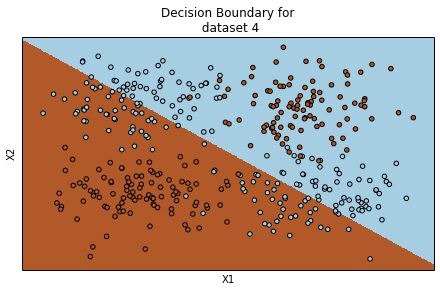

In [181]:
h = .02  # step size in the mesh
x_min, x_max = X4[:, 0].min() - .5, X4[:, 0].max() + .5
y_min, y_max = X4[:, 1].min() - .5, X4[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logit_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X4[:, 0], X4[:, 1], c=Y4, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for \n dataset 4')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.tight_layout()
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('../ImageFiles/HW2/Q1_2_DecisionBoundary_Dataset4.png', dpi=100)


In [ ]:
# Decision Boundary for dataset 1

In [182]:
logit_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                          intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_1.fit(X,Y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

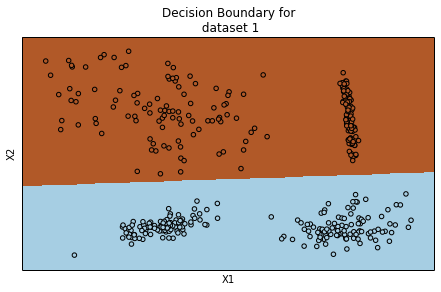

In [183]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logit_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for  \n dataset 1')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.tight_layout()
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
fig.set_size_inches(7, 5)
fig.savefig('../ImageFiles/HW2/Q1_2_DecisionBoundary_Dataset1.png', dpi=100)
plt.show()

In [147]:
logit_1 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                          intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_1.fit(X3,Y3)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

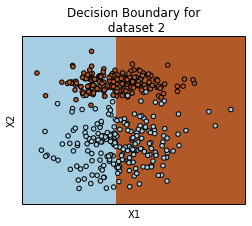

In [151]:
h = .02  # step size in the mesh
x_min, x_max = X3[:, 0].min() - .5, X3[:, 0].max() + .5
y_min, y_max = X3[:, 1].min() - .5, X3[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logit_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X3[:, 0], X3[:, 1], c=Y3, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for  \n dataset 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

L1 regularization

In [104]:
logit_0_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1000000, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_0_1_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_1_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')
logit_5_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=0.2, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

In [106]:
model_0_set1 = logit_0_L1.fit(X,Y)
print model_0_set1.coef_,model_0_set1.intercept_
print ClassError(Y,model_0_set1.predict(X))
print ClassError(Y_V,model_0_set1.predict(X_V))

print '-----------------'

model_0_set2 = logit_0_L1.fit(X2,Y2)
print model_0_set2.coef_,model_0_set2.intercept_
print ClassError(Y2,model_0_set2.predict(X2))
print ClassError(Y2_V,model_0_set2.predict(X2_V))

print '-----------------'


model_0_set3 = logit_0_L1.fit(X3,Y3)
print model_0_set3.coef_,model_0_set3.intercept_
print ClassError(Y3,model_0_set3.predict(X3))
print ClassError(Y3_V,model_0_set3.predict(X3_V))

print '-----------------'

model_0_set4 = logit_0_L1.fit(X4,Y4)
print model_0_set4.coef_,model_0_set4.intercept_
print ClassError(Y4,model_0_set4.predict(X4))
print ClassError(Y4_V,model_0_set4.predict(X4_V))

[[ -1.09772346  11.59660703]] [ 6.01612364]
0
0
-----------------
[[ 1.82487211  0.00234968]] [ 0.18253837]
68
35
-----------------
[[ -0.45825413  13.55400495]] [-6.60133013]
5
7
-----------------
[[-0.02473661 -0.0237256 ]] [ 0.00059732]
194
203


In [107]:
model_0_1_set1 = logit_0_1_L1.fit(X,Y)
print model_0_1_set1.coef_,model_0_1_set1.intercept_
print ClassError(Y,model_0_1_set1.predict(X))
print ClassError(Y_V,model_0_1_set1.predict(X_V))

print '-----------------'

model_0_1_set2 = logit_0_1_L1.fit(X2,Y2)
print model_0_1_set2.coef_,model_0_set2.intercept_
print ClassError(Y2,model_0_1_set2.predict(X2))
print ClassError(Y2_V,model_0_1_set2.predict(X2_V))

print '-----------------'


model_0_1_set3 = logit_0_L1.fit(X3,Y3)
print model_0_1_set3.coef_,model_0_1_set3.intercept_
print ClassError(Y3,model_0_1_set3.predict(X3))
print ClassError(Y3_V,model_0_1_set3.predict(X3_V))

print '-----------------'

model_0_1_set4 = logit_0_1_L1.fit(X4,Y4)
print model_0_1_set4.coef_,model_0_1_set4.intercept_
print ClassError(Y4,model_0_1_set4.predict(X4))
print ClassError(Y4_V,model_0_1_set4.predict(X4_V))

[[-0.60275467  7.14067647]] [ 3.33279442]
0
0
-----------------
[[  1.82086942e+00   1.42419366e-03]] [ 0.00059732]
68
35
-----------------
[[ -0.4582527   13.55179174]] [-6.60005801]
5
7
-----------------
[[-0.02451843 -0.02352644]] [ 0.]
193
201


In [108]:
model_1_set1 = logit_1_L1.fit(X,Y)
print model_1_set1.coef_,model_1_set1.intercept_
print ClassError(Y,model_1_set1.predict(X))
print ClassError(Y_V,model_1_set1.predict(X_V))

print '-----------------'

model_1_set2 = logit_1_L1.fit(X2,Y2)
print model_1_set2.coef_,model_1_set2.intercept_
print ClassError(Y2,model_1_set1.predict(X2))
print ClassError(Y2_V,model_1_set1.predict(X2_V))

print '-----------------'


model_1_set3 = logit_1_L1.fit(X3,Y3)
print model_1_set3.coef_,model_1_set3.intercept_
print ClassError(Y3,model_1_set3.predict(X3))
print ClassError(Y3_V,model_1_set3.predict(X3_V))

print '-----------------'

model_1_set4 = logit_1_L1.fit(X4,Y4)
print model_1_set4.coef_,model_1_set4.intercept_
print ClassError(Y4,model_1_set4.predict(X4))
print ClassError(Y4_V,model_1_set4.predict(X4_V))

[[-0.18983063  4.36971868]] [ 1.49728345]
0
0
-----------------
[[ 1.7870139  0.       ]] [ 0.15674468]
67
35
-----------------
[[-0.18838264  7.76259808]] [-3.14020992]
7
7
-----------------
[[-0.02264641 -0.0216913 ]] [ 0.]
193
201


In [109]:
model_5_set1 = logit_5_L1.fit(X,Y)
print model_5_set1.coef_,model_5_set1.intercept_
print ClassError(Y,model_5_set1.predict(X))
print ClassError(Y_V,model_5_set1.predict(X_V))

print '-----------------'

model_5_set2 = logit_5_L1.fit(X2,Y2)
print model_5_set2.coef_,model_5_set2.intercept_
print ClassError(Y2,model_5_set1.predict(X2))
print ClassError(Y2_V,model_5_set1.predict(X2_V))

print '-----------------'


model_5_set3 = logit_5_L1.fit(X3,Y3)
print model_5_set3.coef_,model_5_set3.intercept_
print ClassError(Y3,model_5_set1.predict(X3))
print ClassError(Y3_V,model_5_set1.predict(X3_V))

print '-----------------'

model_5_set4 = logit_5_L1.fit(X4,Y4)
print model_5_set4.coef_,model_5_set4.intercept_
print ClassError(Y4,model_5_set1.predict(X4))
print ClassError(Y4_V,model_5_set1.predict(X4_V))

[[ 0.          2.93358062]] [ 0.2631319]
3
0
-----------------
[[ 1.65304952  0.        ]] [ 0.05867488]
70
37
-----------------
[[ 0.          4.39658007]] [-1.07050268]
10
8
-----------------
[[-0.01432705 -0.0135517 ]] [ 0.]
193
203


In [107]:
# Grid search for lambda in each dataset to get the lambda that gives the minimum error rate 
lambdaList = np.linspace(0.1,5,50)
classError_D1 = []
classError_D2 = []
classError_D3 = []
classError_D4 = []
for i in lambdaList:
    logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1/i, fit_intercept=True, 
                                               intercept_scaling=1, max_iter=1000, multi_class='ovr')

    
    model_set1 = logit_L2.fit(X,Y)
    classError_D1.append(ClassError(Y_V,model_set1.predict(X_V)))
    
    model_set2 = logit_L2.fit(X2,Y2)
    classError_D2.append(ClassError(Y2_V,model_set2.predict(X2_V)))
    
    model_set3 = logit_L2.fit(X3,Y3)
    classError_D3.append(ClassError(Y3_V,model_set3.predict(X3_V)))
    
    model_set4 = logit_L2.fit(X4,Y4)
    classError_D4.append(ClassError(Y4_V,model_set3.predict(X4_V)))
    

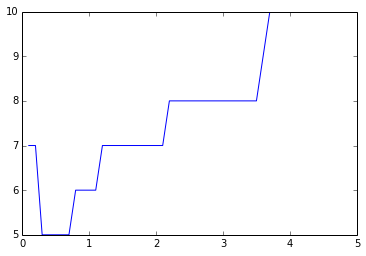

In [185]:
plt.plot(lambdaList,classError_D3)

In [140]:
# Evaluating at the test set for L2
# Dataset 1
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(X,Y)
print ClassError(Y_Test,model_set.predict(X_Test))


# Dataset 2
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(X2,Y2)
print ClassError(Y2_Test,model_set.predict(X2_Test))

# Dataset 3
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=2, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(X3,Y3)
print ClassError(Y3_Test,model_set.predict(X3_Test))

# Dataset 4
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(X4,Y4)
print ClassError(Y4_Test,model_set.predict(X4_Test))

0
39
7
201


In [118]:
lambdaList = np.linspace(0.1,5,50)
classError_L1_D1 = []
classError_L1_D2 = []
classError_L1_D3 = []
classError_L1_D4 = []
for i in lambdaList:
    logit_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1/i, fit_intercept=True, 
                                               intercept_scaling=1, max_iter=1000, multi_class='ovr')

    
    model_set1 = logit_L1.fit(X,Y)
    classError_L1_D1.append(ClassError(Y_V,model_set1.predict(X_V)))
    
    model_set2 = logit_L1.fit(X2,Y2)
    classError_L1_D2.append(ClassError(Y2_V,model_set2.predict(X2_V)))
    
    model_set3 = logit_L1.fit(X3,Y3)
    classError_L1_D3.append(ClassError(Y3_V,model_set3.predict(X3_V)))
    
    model_set4 = logit_L1.fit(X4,Y4)
    classError_L1_D4.append(ClassError(Y4_V,model_set3.predict(X4_V)))

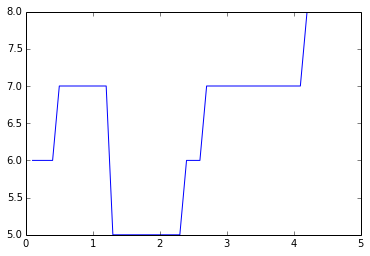

In [186]:
plt.plot(lambdaList,classError_L1_D3)

In [152]:
# Evaluating at the test set for L1

# Dataset 1
logit_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1/i, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L1.fit(X,Y)
print ClassError(Y_Test,model_set.predict(X_Test))
# Dataset 2
logit_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1/i, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L1.fit(X2,Y2)
print ClassError(Y2_Test,model_set.predict(X2_Test))

# Dataset 3
logit_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1/i, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L1.fit(X3,Y3)
print ClassError(Y3_Test,model_set.predict(X3_Test))

# Dataset 4
logit_L1 = linear_model.LogisticRegression(penalty='l1', tol=0.0001, C=1/i, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L1.fit(X4,Y4)
print ClassError(Y4_Test,model_set.predict(X4_Test))

1
38
5
201


# Question 2

In [2]:
import numpy as np
#import cvxopt
import cvxopt

In [3]:
# define your matrices
P = matrix(...)
q = matrix(...)
G = matrix(...)
h = matrix(...)
A = matrix(...)
b = matrix(...)
# find the solution	
solution = solvers.qp(P, q, G, h, A, b)
xvals = np.array(solution['x'])

SyntaxError: invalid syntax (<ipython-input-3-d3646c33714f>, line 2)

In [4]:
def intComparison(L,min,max):
    indexList = []
    for i in range(L):
        if (min <= i) and (i <= max):
            indexList.append(L.index(i))
    return indexList
        
    

In [5]:
A = [23,45,12]
#intComparison(A,20,50) 
a = np.array(A)
u = np.where(np.logical_and(a>=20, a<=50))
L = np.array([23,112,12])
L[u]

array([ 23, 112])

In [304]:
# linear SVM (Dual form) with Slack variable
# Input:data

class SVMclassification(object):
    def __init__(self, c,gamma,Kernel):
        self.c = c
        self.gamma = gamma
        self.Kernel = Kernel
        
    def linearKernel(self,X):
        samples, features = X.shape
        K = np.zeros((samples, samples))
    
        for i, xi in enumerate(X):
            for j,xj in enumerate(X):
                K[i,j] = np.dot(xi,xj)
        return (K)
            
            
    def GaussianKernel(self,X):
        samples, features = X.shape
        K = np.zeros((samples, samples))
        for i, xi in enumerate(X):
            for j,xj in enumerate(X):
                K[i,j] = np.exp(-self.gamma*np.linalg.norm(xi-xj) ** 2)
        return (K)
    
    def LagrangeMultipliers(self,X,y):
        # Generate a linear kernel from the data
        if self.Kernel=="linear":
            K = self.linearKernel(X)
        elif self.Kernel=="Gaussian":
            K = self.GaussianKernel(X)
        samples, features = X.shape
        
        # Convex optimization
          
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-1 * np.ones(samples))
    
        # Elementwise for the error inequality
        # alpha_i are greater than 0
        G_std = cvxopt.matrix(np.diag(np.ones(samples) * -1))
        h_std = cvxopt.matrix(np.zeros(samples))

        # alpha_i are less than c
        G_slack = cvxopt.matrix(np.diag(np.ones(samples)))
        h_slack = cvxopt.matrix(np.ones(samples) * self.c)

        G = cvxopt.matrix(np.vstack((G_std, G_slack)))
        h = cvxopt.matrix(np.vstack((h_std, h_slack)))

        
        A = cvxopt.matrix(y, (1, samples))
        A = cvxopt.matrix(A,(1,samples),'d')

        b = cvxopt.matrix(0.0)

        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        xvals = np.array(solution['x'])
        return(xvals)

    
    def SVMClassifier(self,X,y):
        lMultipliers = self.LagrangeMultipliers(X,y)
        SVIndex=np.where(np.logical_and(lMultipliers>=1e-20, lMultipliers<=self.c))[0]
        SV = X[SVIndex,]
        SVlabel = y[SVIndex]
        supportMultipliers = lMultipliers[SVIndex]
        return(SV,SVlabel,supportMultipliers)
        
    def SVMbias(self,X,y):
        SV,SVlabel,SVMult = self.SVMClassifier(X,y)
       
        
        fittedValue = SVMPrediction(0,SVMult,SV,SVlabel).predictSVM(X)
        bias = np.mean(y - fittedValue)
        return(bias)




In [305]:
class SVMPrediction:
    def __init__(self,bias,weight,SV,SVlabel):
        self.bias = bias
        self.weight = weight
        self.SV = SV
        self.SVlabel = SVlabel
        
    def predictSVM(self,X):
        prediction = []
        for i, xi in enumerate(X):
            result = self.bias
            for w,xt,y in zip(self.weight,self.SV,self.SVlabel):
                result+=w*y*np.dot(xt,xi)
            prediction.append(np.sign(result).item())
        return (prediction)
        

In [221]:
#XOR problem
X = np.array([[2,2],[2,3],[0,-1],[-3,-2]])
y = np.array([1,1,-1,-1])
SVM = SVMclassification(1,1,"Gaussian")
SVM.GaussianKernel(X)


array([[  1.00000000e+00,   3.67879441e-01,   2.26032941e-06,
          1.56288219e-18],
       [  3.67879441e-01,   1.00000000e+00,   2.06115362e-09,
          1.92874985e-22],
       [  2.26032941e-06,   2.06115362e-09,   1.00000000e+00,
          4.53999298e-05],
       [  1.56288219e-18,   1.92874985e-22,   4.53999298e-05,
          1.00000000e+00]])

In [222]:
SVM = SVMclassification(1,1,"linear")
bias = SVM.SVMbias(X,y)
SV,SVlabel,SVMult = SVM.SVMClassifier(X,y)
print SV
SVMPrediction(bias,SVMult,SV,SVlabel).predictSVM(X)

     pcost       dcost       gap    pres   dres
 0: -3.2681e-01 -5.4491e+00  2e+01  2e+00  5e-16
 1: -1.5740e-01 -2.4179e+00  3e+00  1e-01  5e-16
 2: -1.1777e-01 -3.4786e-01  2e-01  5e-03  1e-15
 3: -1.4761e-01 -1.6162e-01  1e-02  5e-05  4e-16
 4: -1.5377e-01 -1.5393e-01  2e-04  6e-07  2e-16
 5: -1.5385e-01 -1.5385e-01  2e-06  6e-09  1e-16
 6: -1.5385e-01 -1.5385e-01  2e-08  6e-11  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2681e-01 -5.4491e+00  2e+01  2e+00  5e-16
 1: -1.5740e-01 -2.4179e+00  3e+00  1e-01  5e-16
 2: -1.1777e-01 -3.4786e-01  2e-01  5e-03  1e-15
 3: -1.4761e-01 -1.6162e-01  1e-02  5e-05  4e-16
 4: -1.5377e-01 -1.5393e-01  2e-04  6e-07  2e-16
 5: -1.5385e-01 -1.5385e-01  2e-06  6e-09  1e-16
 6: -1.5385e-01 -1.5385e-01  2e-08  6e-11  5e-16
Optimal solution found.
[[ 2  2]
 [ 0 -1]]


[1.0, 1.0, -1.0, -1.0]

# 2.2

In [223]:
train = pl.loadtxt('../DataFiles/HW2/data1_train.csv')

# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

In [224]:
Y.shape

(400, 1)

In [225]:
type(Y)

numpy.ndarray

In [ ]:
# Classification error rate for different datasets

SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(X,Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_1 = predictorBase.predictSVM(X)
prediction_valid_1 = predictorBase.predictSVM(X_V)

################ dataset 2 ###############

bias = SVM.SVMbias(X2,Y2)
SV,SVlabel,SVMult = SVM.SVMClassifier(X2,Y2)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_2 = predictorBase.predictSVM(X2)
prediction_valid_2 = predictorBase.predictSVM(X2_V)


################ dataset 3 ###############

bias = SVM.SVMbias(X3,Y3)
SV,SVlabel,SVMult = SVM.SVMClassifier(X3,Y3)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_3 = predictorBase.predictSVM(X3)
prediction_valid_3 = predictorBase.predictSVM(X3_V)

################ dataset 4 ###############

bias = SVM.SVMbias(X4,Y4)
SV,SVlabel,SVMult = SVM.SVMClassifier(X4,Y4)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_4 = predictorBase.predictSVM(X4)
prediction_valid_4 = predictorBase.predictSVM(X4_V)

In [228]:
print ClassError(prediction_train_1,Y)/len(Y)
print ClassError(prediction_valid_1,Y_V)/ np.float(len(Y_V))

print ClassError(prediction_train_2,Y2) / np.float(len(Y2))
print ClassError(prediction_valid_2,Y2_V)/ np.float(len(Y2_V))

print ClassError(prediction_train_3,Y3)/ np.float(len(Y3))
print ClassError(prediction_valid_3,Y3_V)/ np.float(len(Y3_V))

print ClassError(prediction_train_4,Y4)/ np.float(len(Y4))
print ClassError(prediction_valid_4,Y4_V)/ np.float(len(Y4_V))

0
0.0
0.17
0.17
0.045
0.06
0.495
0.5375


In [229]:
X4_V.shape

(400, 2)

In [ ]:
# Classification error rate for different datasets

SVM = SVMclassification(1,1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(X,Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_1 = predictorBase.predictSVM(X)
prediction_valid_1 = predictorBase.predictSVM(X_V)

################ dataset 2 ###############

bias = SVM.SVMbias(X2,Y2)
SV,SVlabel,SVMult = SVM.SVMClassifier(X2,Y2)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_2 = predictorBase.predictSVM(X2)
prediction_valid_2 = predictorBase.predictSVM(X2_V)


################ dataset 3 ###############

bias = SVM.SVMbias(X3,Y3)
SV,SVlabel,SVMult = SVM.SVMClassifier(X3,Y3)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_3 = predictorBase.predictSVM(X3)
prediction_valid_3 = predictorBase.predictSVM(X3_V)

################ dataset 4 ###############

bias = SVM.SVMbias(X4,Y4)
SV,SVlabel,SVMult = SVM.SVMClassifier(X4,Y4)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
prediction_train_4 = predictorBase.predictSVM(X4)
prediction_valid_4 = predictorBase.predictSVM(X4_V)

In [231]:
print ClassError(prediction_train_1,Y)/len(Y)
print ClassError(prediction_valid_1,Y_V)/ np.float(len(Y_V))

print ClassError(prediction_train_2,Y2) / np.float(len(Y2))
print ClassError(prediction_valid_2,Y2_V)/ np.float(len(Y2_V))

print ClassError(prediction_train_3,Y3)/ np.float(len(Y3))
print ClassError(prediction_valid_3,Y3_V)/ np.float(len(Y3_V))

print ClassError(prediction_train_4,Y4)/ np.float(len(Y4))
print ClassError(prediction_valid_4,Y4_V)/ np.float(len(Y4_V))

0
0.01
0.1775
0.17
0.045
0.09
0.5075
0.4825


In [ ]:
from numpy import *
from plotBoundary import *
import pylab as pl
# import your SVM training code

# parameters
name = 'ls'
print '======Training======'
# load data from csv files
train = pl.loadtxt('../DataFiles/HW2/data1_train.csv')

# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(X,Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
# Carry out training, primal and/or dual
### TODO ###
# Define the predictSVM(x) function, which uses trained parameters
### TODO ###




In [240]:
from plotBoundary import *

In [241]:
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = max((x_max-x_min)/200., (y_max-y_min)/200.)
xx, yy = meshgrid(arange(x_min, x_max, h),arange(y_min, y_max, h))
zz = array([predictorBase.predictSVM(np.array([x])) for x in c_[xx.ravel(), yy.ravel()]])




print '======Validation======'


======Validation======


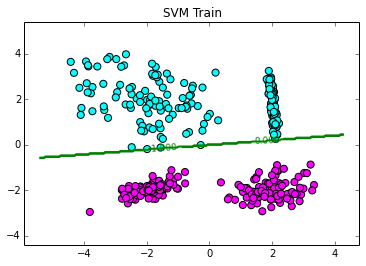

In [242]:
values = [-1,0,1]
title="SVM Train"
zz = zz.reshape(xx.shape)
pl.figure()
CS = pl.contour(xx, yy, zz, values, colors = 'green', linestyles = 'solid', linewidths = 2)
pl.clabel(CS, fontsize=9, inline=1)

# Plot the training points
pl.scatter(X[:, 0], X[:, 1], c=(1.-Y), s=50, cmap = pl.cm.cool)
pl.title(title)
pl.axis('tight')
pl.savefig('../ImageFiles/HW2/SVMTrainingBoundary_Dataset1_Train.pdf')

In [243]:
print '======Validation======'
# load data from csv files
validate = pl.loadtxt('../DataFiles/HW2/data1_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = max((x_max-x_min)/200., (y_max-y_min)/200.)
xx, yy = meshgrid(arange(x_min, x_max, h),arange(y_min, y_max, h))
zz = array([predictorBase.predictSVM(np.array([x])) for x in c_[xx.ravel(), yy.ravel()]])


======Validation======


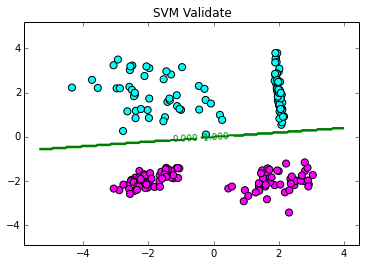

In [244]:
values = [-1,0,1]
title="SVM Validate"
zz = zz.reshape(xx.shape)
pl.figure()
CS = pl.contour(xx, yy, zz, values, colors = 'green', linestyles = 'solid', linewidths = 2)
pl.clabel(CS, fontsize=9, inline=1)

# Plot the training points
pl.scatter(X[:, 0], X[:, 1], c=(1.-Y), s=50, cmap = pl.cm.cool)
pl.title(title)
pl.axis('tight')
pl.savefig('../ImageFiles/HW2/SVMTBoundary_Dataset1_Validate.pdf')

In [659]:
for x in c_[xx.ravel(), yy.ravel()]:
    a = x

     pcost       dcost       gap    pres   dres
 0: -2.2102e+02 -1.1032e+03  6e+03  3e+00  2e-14
 1: -1.4926e+02 -7.6319e+02  1e+03  4e-01  1e-14
 2: -1.3704e+02 -2.4046e+02  1e+02  1e-02  1e-14
 3: -1.5807e+02 -1.8764e+02  3e+01  3e-03  1e-14
 4: -1.6226e+02 -1.8229e+02  2e+01  2e-03  1e-14
 5: -1.6618e+02 -1.7648e+02  1e+01  7e-04  1e-14
 6: -1.6783e+02 -1.7420e+02  6e+00  3e-04  1e-14
 7: -1.6882e+02 -1.7293e+02  4e+00  2e-04  1e-14
 8: -1.6948e+02 -1.7191e+02  2e+00  7e-05  1e-14
 9: -1.6966e+02 -1.7168e+02  2e+00  4e-05  1e-14
10: -1.7047e+02 -1.7073e+02  3e-01  3e-06  1e-14
11: -1.7057e+02 -1.7062e+02  6e-02  5e-07  1e-14
12: -1.7059e+02 -1.7059e+02  2e-03  9e-09  1e-14
13: -1.7059e+02 -1.7059e+02  2e-05  9e-11  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2102e+02 -1.1032e+03  6e+03  3e+00  2e-14
 1: -1.4926e+02 -7.6319e+02  1e+03  4e-01  1e-14
 2: -1.3704e+02 -2.4046e+02  1e+02  1e-02  1e-14
 3: -1.5807e+02 -1.8764e+02  3e+01  3e-03  1e-1

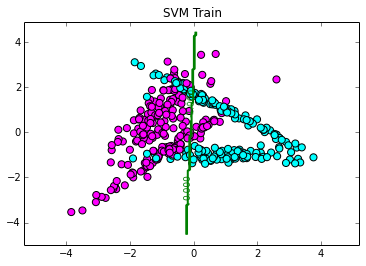

In [312]:
## For dataset 2
# load data from csv files
train = pl.loadtxt('../DataFiles/HW2/data2_train.csv')

# use deep copy here to make cvxopt happy
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(X,Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)

predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = max((x_max-x_min)/200., (y_max-y_min)/200.)
xx, yy = meshgrid(arange(x_min, x_max, h),arange(y_min, y_max, h))
zz = array([predictorBase.predictSVM(np.array([x])) for x in c_[xx.ravel(), yy.ravel()]])

values = [-1,0,1]
title="SVM Train"
zz = zz.reshape(xx.shape)
pl.figure()
CS = pl.contour(xx, yy, zz, values, colors = 'green', linestyles = 'solid', linewidths = 2)
pl.clabel(CS, fontsize=9, inline=1)

# Plot the training points
pl.scatter(X[:, 0], X[:, 1], c=(1.-Y), s=50, cmap = pl.cm.cool)
pl.title(title)
pl.axis('tight')
pl.savefig('../ImageFiles/HW2/SVMTrainingBoundary_Dataset2_Train.pdf')

======Validation======


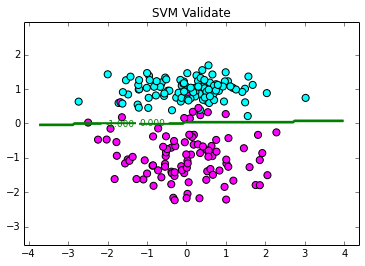

In [300]:
print '======Validation======'
# load data from csv files
validate = pl.loadtxt('../DataFiles/HW2/data3_validate.csv')
X = validate[:, 0:2]
Y = validate[:, 2:3]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = max((x_max-x_min)/200., (y_max-y_min)/200.)
xx, yy = meshgrid(arange(x_min, x_max, h),arange(y_min, y_max, h))
zz = array([predictorBase.predictSVM(np.array([x])) for x in c_[xx.ravel(), yy.ravel()]])

values = [-1,0,1]
title="SVM Validate"
zz = zz.reshape(xx.shape)
pl.figure()
CS = pl.contour(xx, yy, zz, values, colors = 'green', linestyles = 'solid', linewidths = 2)
pl.clabel(CS, fontsize=9, inline=1)

# Plot the training points
pl.scatter(X[:, 0], X[:, 1], c=(1.-Y), s=50, cmap = pl.cm.cool)
pl.title(title)
pl.axis('tight')
pl.savefig('../ImageFiles/HW2/SVMTBoundary_Dataset3_Validate.pdf')

## Linear SVM

In [ ]:
X = train[:, 0:2].copy()
Y = train[:, 2:3].copy()

SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(X,Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
len(SV)

In [ ]:
C = [0.01,0.1,1,10,100]
SVList_Linear = []
MarginList_Linear = []
for i in C:
    SVM = SVMclassification(i,1,"linear")
    bias = SVM.SVMbias(X,Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
    SVList_Linear.append(len(SV))
    MarginList_Linear.append(1/np.sqrt(sum(SVMult)))
    #SVMPrediction(bias,SVMult,SV,SVlabel).predictSVM(X)


In [318]:
print SVList_Linear
print MarginList_Linear

[253, 186, 174, 182, 176]
[0.63236477461380525, 0.23280958464543744, 0.076369944730076578, 0.024260621737666396, 0.0076757458113052351]


In [ ]:
C = [0.01,0.1,1,10,100]
SVList_Gaussian = []
MarginList_Gaussian = []
for i in C:
    SVM = SVMclassification(i,1,"Gaussian")
    bias = SVM.SVMbias(X,Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
    SVList_Gaussian.append(len(SV))
    MarginList_Gaussian.append(1/np.sqrt(sum(SVMult)))
    #SVMPrediction(bias,SVMult,SV,SVlabel).predictSVM(X)

In [321]:
print SVList_Gaussian
print MarginList_Gaussian

[390, 237, 125, 85, 109]
[0.50636990636896861, 0.2115277923356135, 0.097584993687249072, 0.040303937835975016, 0.015134997430060909]


In [ ]:
C = [0.01,0.1,1,10,100]
SVList_Gaussian_100 = []
MarginList_Gaussian_100 = []
for i in C:
    SVM = SVMclassification(i,100,"Gaussian")
    bias = SVM.SVMbias(X,Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
    SVList_Gaussian_100.append(len(SV))
    MarginList_Gaussian_100.append(1/np.sqrt(sum(SVMult)))
    #SVMPrediction(bias,SVMult,SV,SVlabel).predictSVM(X)

print SVList_Gaussian_100
print MarginList_Gaussian_100

In [323]:
print SVList_Gaussian_100
print MarginList_Gaussian_100

[397, 397, 365, 359, 359]
[0.50636999791513904, 0.16012815955065929, 0.063184640020272922, 0.053081961412325449, 0.044011249559079257]


In [ ]:
C = [0.01,0.1,1,10,100]
SVList_Gaussian_10 = []
MarginList_Gaussian_10 = []
for i in C:
    SVM = SVMclassification(i,10,"Gaussian")
    bias = SVM.SVMbias(X,Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(X,Y)
    SVList_Gaussian_10.append(len(SV))
    MarginList_Gaussian_10.append(1/np.sqrt(sum(SVMult)))
    #SVMPrediction(bias,SVMult,SV,SVlabel).predictSVM(X)

In [325]:
print SVList_Gaussian_10
print MarginList_Gaussian_10

[394, 380, 208, 208, 198]
[0.50637135119844146, 0.16441901969020314, 0.094784802248604472, 0.052565716084995974, 0.022722093438679449]


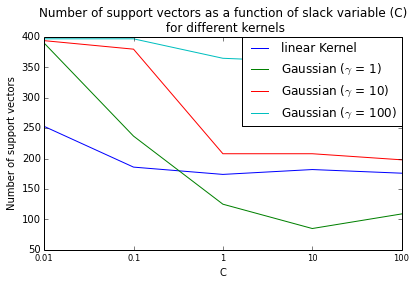

In [435]:
# Plot the number of support vectors across different kernels
W1 = C
plt.plot(range(len(SVList_Linear)),SVList_Linear,label='linear Kernel')
plt.plot(range(len(SVList_Gaussian)),SVList_Gaussian,label='Gaussian ($\gamma$ = 1)')
plt.plot(range(len(SVList_Gaussian_10)),SVList_Gaussian_10,label='Gaussian ($\gamma$ = 10)')
plt.plot(range(len(SVList_Gaussian_100)),SVList_Gaussian_100,label='Gaussian ($\gamma$ = 100)')
plt.xlabel('C')
plt.ylabel('Number of support vectors')
plt.title('Number of support vectors as a function of slack variable (C) \n for different kernels')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.tight_layout()

pl.savefig('../ImageFiles/HW2/Q2_3_SVs_for_Kernels.pdf')
plt.show()



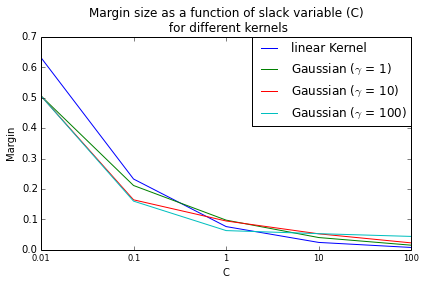

In [436]:
# Plot the margin across different kernels
W1 = C
plt.plot(range(len(MarginList_Linear)),MarginList_Linear,label='linear Kernel')
plt.plot(range(len(MarginList_Gaussian)),MarginList_Gaussian,label='Gaussian ($\gamma$ = 1)')
plt.plot(range(len(MarginList_Gaussian_10)),MarginList_Gaussian_10,label='Gaussian ($\gamma$ = 10)')
plt.plot(range(len(MarginList_Gaussian_100)),MarginList_Gaussian_100,label='Gaussian ($\gamma$ = 100)')
plt.xlabel('C')
plt.ylabel('Margin')
plt.title('Margin size as a function of slack variable (C) \n for different kernels')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.tight_layout()

pl.savefig('../ImageFiles/HW2/Q2_3_Margins_for_Kernels.pdf')
plt.show()

# RBF Kernel

# Question 3

In [9]:
# Add the intercept term
a = np.array([2,12,3,12])
np.append(1,a)
a[1:]

array([12,  3, 12])

In [10]:
# Using Pegasos for SVM classification
def predict_linearSVM(X,Y,lambda_shrink,max_epoch):
    """
       This function returns the weights based on linear SVM function provided X and Y, shrinkage parameter
       and maximum number of epoch(Going throught the entire data set in an SGD manner)
    """
    
    epoch = 0
    sample,feature = X.shape
    t = 0
    W = np.array([0]*(feature+1))
    while epoch < max_epoch:
        for i in range(sample):
            t = t+1
            eta_t = 1./(lambda_shrink*t)
            sampleX = X[i,]
            sampleXInt = np.append(1,sampleX)
            sampleY = Y[i]
            print sampleY*(np.dot(W,sampleXInt))
            if sampleY*(np.dot(W,sampleXInt))<1:
                W[0] = W[0]+eta_t*sampleY
                W[1:] = ((1-(eta_t*lambda_shrink))*W[1:])+eta_t*sampleY*sampleX
            else:
                W[0] = W[0]
                W[1:] = W[1:]+(1-(eta_t*lambda_shrink))*W[1:]
        epoch +=1
    return (W)

In [441]:
train = loadtxt('../DataFiles/HW2/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]
#predict_linearSVM(X,Y,1,3)


In [664]:
from numpy import *
from plotBoundary import *
import pylab as pl
# import your LR training code


# load data from csv files
train = loadtxt('../DataFiles/HW2/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]

# Carry out training.
### TODO %%%


# Define the predict_linearSVM(x) function, which uses global trained parameters, w
### TODO: define predict_linearSVM(x) ###

# plot training results
plotDecisionBoundary(X, Y, predict_linearSVM, [-1,0,1], title = 'Linear SVM')
pl.show()

NameError: name 'predict_linearSVM' is not defined

# Question 4

In [9]:
# Generating Train, Test and Validation set for this question

MNISTData_0 = pl.loadtxt('../DataFiles/HW2/mnist_digit_0.csv')
MNISTData_0_Train =MNISTData_0[:200,]
MNISTData_0_Valid =MNISTData_0[201:351,]
MNISTData_0_Test =MNISTData_0[351:501,]

MNISTData_1 = pl.loadtxt('../DataFiles/HW2/mnist_digit_1.csv')
MNISTData_1_Train =MNISTData_1[:200,]
MNISTData_1_Valid =MNISTData_1[201:351,]
MNISTData_1_Test =MNISTData_1[351:501,]

MNISTData_2 = pl.loadtxt('../DataFiles/HW2/mnist_digit_2.csv')
MNISTData_2_Train =MNISTData_2[:200,]
MNISTData_2_Valid =MNISTData_2[201:351,]
MNISTData_2_Test =MNISTData_2[351:501,]

MNISTData_3 = pl.loadtxt('../DataFiles/HW2/mnist_digit_3.csv')
MNISTData_3_Train =MNISTData_3[:200,]
MNISTData_3_Valid =MNISTData_3[201:351,]
MNISTData_3_Test =MNISTData_3[351:501,]

MNISTData_4 = pl.loadtxt('../DataFiles/HW2/mnist_digit_4.csv')
MNISTData_4_Train =MNISTData_4[:200,]
MNISTData_4_Valid =MNISTData_4[201:351,]
MNISTData_4_Test =MNISTData_4[351:501,]

MNISTData_5 = pl.loadtxt('../DataFiles/HW2/mnist_digit_5.csv')
MNISTData_5_Train =MNISTData_5[:200,]
MNISTData_5_Valid =MNISTData_5[201:351,]
MNISTData_5_Test =MNISTData_5[351:501,]

MNISTData_6 = pl.loadtxt('../DataFiles/HW2/mnist_digit_6.csv')
MNISTData_6_Train =MNISTData_6[:200,]
MNISTData_6_Valid =MNISTData_6[201:351,]
MNISTData_6_Test =MNISTData_6[351:501,]

MNISTData_7 = pl.loadtxt('../DataFiles/HW2/mnist_digit_7.csv')
MNISTData_7_Train =MNISTData_7[:200,]
MNISTData_7_Valid =MNISTData_7[201:351,]
MNISTData_7_Test =MNISTData_7[351:501,]

MNISTData_8 = pl.loadtxt('../DataFiles/HW2/mnist_digit_8.csv')
MNISTData_8_Train =MNISTData_8[:200,]
MNISTData_8_Valid =MNISTData_8[201:351,]
MNISTData_8_Test =MNISTData_8[351:501,]

MNISTData_9 = pl.loadtxt('../DataFiles/HW2/mnist_digit_9.csv')
MNISTData_9_Train =MNISTData_9[:200,]
MNISTData_9_Valid =MNISTData_9[201:351,]
MNISTData_9_Test =MNISTData_9[351:501,]

In [10]:
MNISTData_1_Train.shape[0]

200

In [11]:
MNISTData_1_Train_Augmented = np.c_[np.array([1.0]*MNISTData_1_Train.shape[0]), MNISTData_1_Train]
MNISTData_1_Valid_Augmented = np.c_[np.array([1.0]*MNISTData_1_Valid.shape[0]), MNISTData_1_Valid]
MNISTData_1_Test_Augmented = np.c_[np.array([1.0]*MNISTData_1_Test.shape[0]), MNISTData_1_Test]

MNISTData_7_Train_Augmented = np.c_[np.array([-1.0]*MNISTData_7_Train.shape[0]), MNISTData_7_Train]
MNISTData_7_Valid_Augmented = np.c_[np.array([-1.0]*MNISTData_7_Valid.shape[0]), MNISTData_7_Valid]
MNISTData_7_Test_Augmented = np.c_[np.array([-1.0]*MNISTData_7_Test.shape[0]), MNISTData_7_Test]

In [12]:
print MNISTData_7_Test_Augmented[:,1:].shape
print MNISTData_7_Test_Augmented.shape

(150, 784)
(150, 785)


In [13]:
# Set 1
# Get the X and Y's separately
Set1_train = np.vstack([MNISTData_1_Train_Augmented,MNISTData_7_Train_Augmented])
np.random.shuffle(Set1_train)
Set1_train_X = Set1_train[:,1:]
Set1_train_X_Norm = (2*Set1_train_X/255)-1
Set1_train_Y = Set1_train[:,0]

Set1_valid = np.vstack([MNISTData_1_Valid_Augmented,MNISTData_7_Valid_Augmented])
np.random.shuffle(Set1_valid)
Set1_valid_X = Set1_valid[:,1:]
Set1_valid_X_Norm = (2*Set1_valid_X/255)-1
Set1_valid_Y = Set1_valid[:,0]

Set1_test = np.vstack([MNISTData_1_Test_Augmented,MNISTData_7_Test_Augmented])
np.random.shuffle(Set1_test)
Set1_test_X = Set1_test[:,1:]
Set1_test_X_Norm = (2*Set1_test_X/255)-1
Set1_test_Y = Set1_test[:,0]


In [14]:
Set1_train_X.shape

(400, 784)

In [15]:
MNISTData_3_Train_Augmented = np.c_[np.array([1.0]*MNISTData_3_Train.shape[0]), MNISTData_3_Train]
MNISTData_3_Valid_Augmented = np.c_[np.array([1.0]*MNISTData_3_Valid.shape[0]), MNISTData_3_Valid]
MNISTData_3_Test_Augmented = np.c_[np.array([1.0]*MNISTData_3_Test.shape[0]), MNISTData_3_Test]

MNISTData_5_Train_Augmented = np.c_[np.array([-1.0]*MNISTData_5_Train.shape[0]), MNISTData_5_Train]
MNISTData_5_Valid_Augmented = np.c_[np.array([-1.0]*MNISTData_5_Valid.shape[0]), MNISTData_5_Valid]
MNISTData_5_Test_Augmented = np.c_[np.array([-1.0]*MNISTData_5_Test.shape[0]), MNISTData_5_Test]

In [16]:
# Set 2
Set2_train = np.vstack([MNISTData_3_Train_Augmented,MNISTData_5_Train_Augmented])
np.random.shuffle(Set2_train)
Set2_train_X = Set2_train[:,1:]
Set2_train_X_Norm = (2*Set2_train_X/255)-1
Set2_train_Y = Set2_train[:,0]

Set2_valid = np.vstack([MNISTData_3_Valid_Augmented,MNISTData_5_Valid_Augmented])
np.random.shuffle(Set2_valid)
Set2_valid_X = Set2_valid[:,1:]
Set2_valid_X_Norm = (2*Set2_valid_X/255)-1
Set2_valid_Y = Set2_valid[:,0]

Set2_test = np.vstack([MNISTData_3_Test_Augmented,MNISTData_5_Test_Augmented])
np.random.shuffle(Set2_test)
Set2_test_X = Set2_test[:,1:]
Set2_test_X_Norm = (2*Set2_test_X/255)-1
Set2_test_Y = Set2_test[:,0]

In [17]:
MNISTData_4_Train_Augmented = np.c_[np.array([1.0]*MNISTData_4_Train.shape[0]), MNISTData_4_Train]
MNISTData_4_Valid_Augmented = np.c_[np.array([1.0]*MNISTData_4_Valid.shape[0]), MNISTData_4_Valid]
MNISTData_4_Test_Augmented = np.c_[np.array([1.0]*MNISTData_4_Test.shape[0]), MNISTData_4_Test]

MNISTData_9_Train_Augmented = np.c_[np.array([-1.0]*MNISTData_9_Train.shape[0]), MNISTData_9_Train]
MNISTData_9_Valid_Augmented = np.c_[np.array([-1.0]*MNISTData_9_Valid.shape[0]), MNISTData_9_Valid]
MNISTData_9_Test_Augmented = np.c_[np.array([-1.0]*MNISTData_9_Test.shape[0]), MNISTData_9_Test]

In [18]:
# Set 3
Set3_train = np.vstack([MNISTData_4_Train_Augmented,MNISTData_9_Train_Augmented])
np.random.shuffle(Set3_train)
Set3_train_X = Set3_train[:,1:]
Set3_train_X_Norm = (2*Set3_train_X/255)-1
Set3_train_Y = Set3_train[:,0]

Set3_valid = np.vstack([MNISTData_4_Valid_Augmented,MNISTData_9_Valid_Augmented])
np.random.shuffle(Set3_valid)
Set3_valid_X = Set3_valid[:,1:]
Set3_valid_X_Norm = (2*Set3_valid_X/255)-1
Set3_valid_Y = Set3_valid[:,0]

Set3_test = np.vstack([MNISTData_4_Test_Augmented,MNISTData_9_Test_Augmented])
np.random.shuffle(Set3_test)
Set3_test_X = Set3_test[:,1:]
Set3_test_X_Norm = (2*Set3_test_X/255)-1
Set3_test_Y = Set3_test[:,0]

In [19]:
MNISTData_Evens_Train = np.vstack ([MNISTData_0_Train,MNISTData_2_Train,MNISTData_4_Train,MNISTData_6_Train,MNISTData_8_Train])
MNISTData_Odds_Train = np.vstack([MNISTData_1_Train,MNISTData_3_Train,MNISTData_5_Train,MNISTData_7_Train,MNISTData_9_Train])

MNISTData_Evens_Valid = np.vstack ([MNISTData_0_Valid,MNISTData_2_Valid,MNISTData_4_Valid,MNISTData_6_Valid,MNISTData_8_Valid])
MNISTData_Odds_Valid = np.vstack([MNISTData_1_Valid,MNISTData_3_Valid,MNISTData_5_Valid,MNISTData_7_Valid,MNISTData_9_Valid])

MNISTData_Evens_Test = np.vstack ([MNISTData_0_Test,MNISTData_2_Test,MNISTData_4_Test,MNISTData_6_Test,MNISTData_8_Test])
MNISTData_Odds_Test = np.vstack([MNISTData_1_Test,MNISTData_3_Test,MNISTData_5_Test,MNISTData_7_Test,MNISTData_9_Test])


In [20]:
MNISTData_Evens_Train_Augmented = np.c_[np.array([1.0]*MNISTData_Evens_Train.shape[0]), MNISTData_Evens_Train]
MNISTData_Evens_Valid_Augmented = np.c_[np.array([1.0]*MNISTData_Evens_Valid.shape[0]), MNISTData_Evens_Valid]
MNISTData_Evens_Test_Augmented = np.c_[np.array([1.0]*MNISTData_Evens_Test.shape[0]), MNISTData_Evens_Test]

MNISTData_Odds_Train_Augmented = np.c_[np.array([-1.0]*MNISTData_Odds_Train.shape[0]), MNISTData_Odds_Train]
MNISTData_Odds_Valid_Augmented = np.c_[np.array([-1.0]*MNISTData_Odds_Valid.shape[0]), MNISTData_Odds_Valid]
MNISTData_Odds_Test_Augmented = np.c_[np.array([-1.0]*MNISTData_Odds_Test.shape[0]), MNISTData_Odds_Test]

In [21]:
MNISTData_Odds_Test_Augmented.shape

(750, 785)

In [22]:
# Set 4
Set4_train = np.vstack([MNISTData_Evens_Train_Augmented,MNISTData_Odds_Train_Augmented])
np.random.shuffle(Set4_train)
Set4_train_X = Set4_train[:,1:]
Set4_train_X_Norm = (2*Set4_train_X/255)-1
Set4_train_Y = Set4_train[:,0]

Set4_valid = np.vstack([MNISTData_Evens_Valid_Augmented,MNISTData_Odds_Valid_Augmented])
np.random.shuffle(Set4_valid)
Set4_valid_X = Set4_valid[:,1:]
Set4_valid_X_Norm = (2*Set4_valid_X/255)-1
Set4_valid_Y = Set4_valid[:,0]

Set4_test = np.vstack([MNISTData_Evens_Test_Augmented,MNISTData_Odds_Test_Augmented])
np.random.shuffle(Set4_test)
Set4_test_X = Set4_test[:,1:]
Set4_test_X_Norm = (2*Set4_test_X/255)-1
Set4_test_Y = Set4_test[:,0]

## Application of logistic regression

In [251]:
# Use the validation set to pick the optimal lambda
# In this case I am only doing L2 norm penalizati
lambdaList = np.linspace(0.1,5,50)
classError_D1_Train  = []
classError_D1_Valid  = []
classError_D2_Train  = []
classError_D2_Valid  = []
classError_D3_Train  = []
classError_D3_Valid  = []
classError_D4_Train  = []
classError_D4_Valid  = []

for i in lambdaList:
    logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1/i, fit_intercept=True, intercept_scaling=1, max_iter=1000, multi_class='ovr')

    
    model_set1 = logit.fit(Set1_train_X,Set1_train_Y)

    classError_D1_Train.append(ClassError(Set1_train_Y,model_set1.predict(Set1_train_X))/np.float(len(Set1_train_Y)))
    classError_D1_Valid.append(ClassError(Set1_valid_Y,model_set1.predict(Set1_valid_X))/np.float(len(Set1_valid_Y)))
    
    model_set2 = logit.fit(Set2_train_X,Set2_train_Y)
    classError_D2_Train.append(ClassError(Set2_train_Y,model_set2.predict(Set2_train_X))/np.float(len(Set2_train_Y)))
    classError_D2_Valid.append(ClassError(Set2_valid_Y,model_set2.predict(Set2_valid_X))/np.float(len(Set2_valid_Y)))
    
    model_set3 = logit.fit(Set3_train_X,Set3_train_Y)
    classError_D3_Train.append(ClassError(Set3_train_Y,model_set3.predict(Set3_train_X))/np.float(len(Set3_train_Y)))
    classError_D3_Valid.append(ClassError(Set3_valid_Y,model_set3.predict(Set3_valid_X))/np.float(len(Set3_valid_Y)))
    
    model_set4 = logit.fit(Set4_train_X,Set4_train_Y)
    classError_D4_Train.append(ClassError(Set4_train_Y,model_set4.predict(Set4_train_X))/np.float(len(Set4_train_Y)))
    classError_D4_Valid.append(ClassError(Set4_valid_Y,model_set4.predict(Set4_valid_X))/np.float(len(Set4_valid_Y)))



In [262]:
#Dataset 1 lambda didn't matter
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set1_train_X,Set1_train_Y)
print ClassError(Set1_train_Y,model_set1.predict(Set1_train_X))/np.float(len(Set1_train_Y))
print ClassError(Set1_test_Y,model_set1.predict(Set1_test_X))/np.float(len(Set1_test_Y))

#Dataset 2 lambda didn't matter
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set2_train_X,Set2_train_Y)
print ClassError(Set2_train_Y,model_set1.predict(Set2_train_X))/np.float(len(Set2_train_Y))
print ClassError(Set2_test_Y,model_set1.predict(Set2_test_X))/np.float(len(Set2_test_Y))

#Dataset 3 lambda didn't matter
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set3_train_X,Set3_train_Y)
print ClassError(Set3_train_Y,model_set1.predict(Set3_train_X))/np.float(len(Set3_train_Y))
print ClassError(Set3_test_Y,model_set1.predict(Set3_test_X))/np.float(len(Set3_test_Y))



#Dataset 4 lambda didn't matter (4.9)
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1/4.9, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set4_train_X,Set4_train_Y)
print ClassError(Set4_train_Y,model_set1.predict(Set4_train_X))/np.float(len(Set4_train_Y))
print ClassError(Set4_test_Y,model_set1.predict(Set4_test_X))/np.float(len(Set4_test_Y))

0.0
0.01
0.0
0.07
0.0
0.0566666666667
0.0
0.143333333333


In [264]:
# Use the validation set to pick the optimal lambda
# In this case I am only doing L2 norm penalizati
lambdaList = np.linspace(0.1,5,50)
classError_D1_Train_Norm  = []
classError_D1_Valid_Norm  = []
classError_D2_Train_Norm  = []
classError_D2_Valid_Norm  = []
classError_D3_Train_Norm  = []
classError_D3_Valid_Norm  = []
classError_D4_Train_Norm  = []
classError_D4_Valid_Norm  = []

for i in lambdaList:
    logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1/i, fit_intercept=True, 
                                            intercept_scaling=1, max_iter=1000, multi_class='ovr')

    
    model_set1 = logit.fit(Set1_train_X_Norm,Set1_train_Y)
    #print ClassError(Set1_train_Y,model_set1.predict(Set1_train_X))
    #print ClassError(Set1_train_Y,model_set1.predict(Set1_train_X))/np.float(len(Set1_train_Y))
    classError_D1_Train_Norm.append(ClassError(Set1_train_Y,model_set1.predict(Set1_train_X_Norm))/np.float(len(Set1_train_Y)))
    classError_D1_Valid_Norm.append(ClassError(Set1_valid_Y,model_set1.predict(Set1_valid_X_Norm))/np.float(len(Set1_valid_Y)))
    
    model_set2 = logit.fit(Set2_train_X_Norm,Set2_train_Y)
    classError_D2_Train_Norm.append(ClassError(Set2_train_Y,model_set2.predict(Set2_train_X_Norm))/np.float(len(Set2_train_Y)))
    classError_D2_Valid_Norm.append(ClassError(Set2_valid_Y,model_set2.predict(Set2_valid_X_Norm))/np.float(len(Set2_valid_Y)))
    
    model_set3 = logit.fit(Set3_train_X_Norm,Set3_train_Y)
    classError_D3_Train_Norm.append(ClassError(Set3_train_Y,model_set3.predict(Set3_train_X_Norm))/np.float(len(Set3_train_Y)))
    classError_D3_Valid_Norm.append(ClassError(Set3_valid_Y,model_set3.predict(Set3_valid_X_Norm))/np.float(len(Set3_valid_Y)))
    
    model_set4 = logit.fit(Set4_train_X,Set4_train_Y)
    classError_D4_Train_Norm.append(ClassError(Set4_train_Y,model_set4.predict(Set4_train_X_Norm))/np.float(len(Set4_train_Y)))
    classError_D4_Valid_Norm.append(ClassError(Set4_valid_Y,model_set4.predict(Set4_valid_X_Norm))/np.float(len(Set4_valid_Y)))



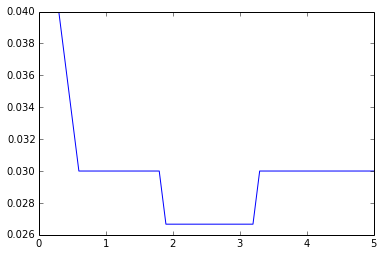

In [277]:
plt.plot(lambdaList,classError_D3_Valid_Norm)

In [279]:
#Dataset 1 lambda didn't matter
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set1_train_X_Norm,Set1_train_Y)
print ClassError(Set1_train_Y,model_set1.predict(Set1_train_X_Norm))/np.float(len(Set1_train_Y))
print ClassError(Set1_test_Y,model_set1.predict(Set1_test_X_Norm))/np.float(len(Set1_test_Y))

#Dataset 2 lambda=0.1
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1/0.1, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set2_train_X_Norm,Set2_train_Y)
print ClassError(Set2_train_Y,model_set1.predict(Set2_train_X_Norm))/np.float(len(Set2_train_Y))
print ClassError(Set2_test_Y,model_set1.predict(Set2_test_X_Norm))/np.float(len(Set2_test_Y))

#Dataset 3 lambda=2.5
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1/2.5, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set3_train_X_Norm,Set3_train_Y)
print ClassError(Set3_train_Y,model_set1.predict(Set3_train_X_Norm))/np.float(len(Set3_train_Y))
print ClassError(Set3_test_Y,model_set1.predict(Set3_test_X_Norm))/np.float(len(Set3_test_Y))



#Dataset 4 lambda didn't matter
logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                        intercept_scaling=1, max_iter=1000, multi_class='ovr')

model_set1 = logit.fit(Set4_train_X_Norm,Set4_train_Y)
print ClassError(Set4_train_Y,model_set1.predict(Set4_train_X_Norm))/np.float(len(Set4_train_Y))
print ClassError(Set4_test_Y,model_set1.predict(Set4_test_X_Norm))/np.float(len(Set4_test_Y))

0.0
0.0133333333333
0.0
0.05
0.0
0.0533333333333
0.038
0.114666666667


In [ ]:
# Test the data with optimal lambda
lambdaList = np.linspace(0.1,5,50)
classError_D1_Train  = []
classError_D1_Valid  = []
classError_D2_Train  = []
classError_D2_Valid  = []
classError_D3_Train  = []
classError_D3_Valid  = []
classError_D4_Train  = []
classError_D4_Valid  = []

for i in lambdaList:
    logit = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1/i, fit_intercept=True, 
                                            intercept_scaling=1, max_iter=1000, multi_class='ovr')

    
    model_set1 = logit.fit(Set1_train_X,Set1_train_Y)
    #print ClassError(Set1_train_Y,model_set1.predict(Set1_train_X))
    #print ClassError(Set1_train_Y,model_set1.predict(Set1_train_X))/np.float(len(Set1_train_Y))
    classError_D1_Train.append(ClassError(Set1_train_Y,model_set1.predict(Set1_train_X))/np.float(len(Set1_train_Y)))
    classError_D1_Valid.append(ClassError(Set1_valid_Y,model_set1.predict(Set1_valid_X))/np.float(len(Set1_valid_Y)))
    
    model_set2 = logit.fit(Set2_train_X,Set2_train_Y)
    classError_D2_Train.append(ClassError(Set2_train_Y,model_set2.predict(Set2_train_X))/np.float(len(Set2_train_Y)))
    classError_D2_Valid.append(ClassError(Set2_valid_Y,model_set2.predict(Set2_valid_X))/np.float(len(Set2_valid_Y)))
    
    model_set3 = logit.fit(Set3_train_X,Set3_train_Y)
    classError_D3_Train.append(ClassError(Set3_train_Y,model_set3.predict(Set3_train_X))/np.float(len(Set3_train_Y)))
    classError_D3_Valid.append(ClassError(Set3_valid_Y,model_set3.predict(Set3_valid_X))/np.float(len(Set3_valid_Y)))
    
    model_set4 = logit.fit(Set4_train_X,Set4_train_Y)
    classError_D4_Train.append(ClassError(Set4_train_Y,model_set4.predict(Set4_train_X))/np.float(len(Set4_train_Y)))
    classError_D4_Valid.append(ClassError(Set4_valid_Y,model_set4.predict(Set4_valid_X))/np.float(len(Set4_valid_Y)))



In [ ]:
# Evaluating at the test set for L2
# Dataset 1
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(Set1_train_X,Set1_train_Y)
print ClassError(Set1_test_Y,model_set.predict(Set1_test_X))/np.float(Set1_test_Y)


# Dataset 2
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(Set2_train_X,Set2_train_Y)
print ClassError(Set2_test_Y,model_set.predict(Set2_test_X))/np.float(Set2_test_Y)

# Dataset 3
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(Set3_train_X,Set3_train_Y)
print ClassError(Set3_test_Y,model_set.predict(Set3_test_X))/np.float(Set3_test_Y)

# Dataset 4
logit_L2 = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=1, fit_intercept=True, 
                                           intercept_scaling=1, max_iter=1000, multi_class='ovr')
model_set = logit_L2.fit(Set4_train_X,Set4_train_Y)
print ClassError(Set4_test_Y,model_set.predict(Set4_test_X))/np.float(Set4_test_Y)

## Application of linear SVM

In [ ]:
Set1_train_X = Set1_train_X.copy()
Set1_train_Y = Set1_train_Y.copy()
SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set1_train_X,Set1_train_Y)
print bias
SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X,Set1_train_Y)

In [ ]:
#predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
#pred1 = predictorBase.predictSVM(Set1_train_X)
# Use the validation set to pick the best C from C = 0.01,0.1,1,10,100
CList = [0.01,0.1,1,10,100]
classError_Set1_Train = []
classError_Set1_Train_Norm = []
classError_Set1_Valid = []
classError_Set1_Valid_Norm = []
classError_Set2_Train = []
classError_Set2_Train_Norm = []
classError_Set2_Valid = []
classError_Set2_Valid_Norm = []
classError_Set3_Train = []
classError_Set3_Train_Norm = []
classError_Set3_Valid = []
classError_Set3_Valid_Norm = []
classError_Set4_Train = []
classError_Set4_Train_Norm = []
classError_Set4_Valid = []
classError_Set4_Valid_Norm = []

Set1_train_X = Set1_train_X.copy()
Set1_train_Y = Set1_train_Y.copy()
Set2_train_X = Set2_train_X.copy()
Set2_train_Y = Set2_train_Y.copy()
Set3_train_X = Set3_train_X.copy()
Set3_train_Y = Set3_train_Y.copy()
Set4_train_X = Set4_train_X.copy()
Set4_train_Y = Set4_train_Y.copy()

SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set1_train_X,Set1_train_Y)
print bias
SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X,Set1_train_Y)
for i in CList:
    SVM = SVMclassification(i,1,"linear") # C has been set to 1
    bias = SVM.SVMbias(Set1_train_X,Set1_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X,Set1_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set1_train_X)
    pred2 = predictorBase.predictSVM(Set1_valid_X)
    classError_Set1_Train.append(ClassError(pred1,Set1_train_Y)/np.float(len(pred1)))
    classError_Set1_Valid.append(ClassError(pred2,Set1_valid_Y)/np.float(len(pred2)))
    
    
    bias = SVM.SVMbias(Set1_train_X_Norm,Set1_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X_Norm,Set1_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set1_train_X_Norm)
    pred2 = predictorBase.predictSVM(Set1_valid_X_Norm)
    classError_Set1_Train_Norm.append(ClassError(pred1,Set1_train_Y)/np.float(len(pred1)))
    classError_Set1_Valid_Norm.append(ClassError(pred2,Set1_valid_Y)/np.float(len(pred2)))
    
    # Set2
    
    SVM = SVMclassification(i,1,"linear") # C has been set to 1
    bias = SVM.SVMbias(Set2_train_X,Set2_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X,Set2_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set2_train_X)
    pred2 = predictorBase.predictSVM(Set2_valid_X)
    classError_Set2_Train.append(ClassError(pred1,Set2_train_Y)/np.float(len(pred1)))
    classError_Set2_Valid.append(ClassError(pred2,Set2_valid_Y)/np.float(len(pred2)))
    
    
    bias = SVM.SVMbias(Set2_train_X_Norm,Set2_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X_Norm,Set2_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set2_train_X_Norm)
    pred2 = predictorBase.predictSVM(Set2_valid_X_Norm)
    classError_Set2_Train_Norm.append(ClassError(pred1,Set2_train_Y)/np.float(len(pred1)))
    classError_Set2_Valid_Norm.append(ClassError(pred2,Set2_valid_Y)/np.float(len(pred2)))
    
    # Set3
    
    SVM = SVMclassification(i,1,"linear") # C has been set to 1
    bias = SVM.SVMbias(Set3_train_X,Set3_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X,Set3_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set3_train_X)
    pred2 = predictorBase.predictSVM(Set3_valid_X)
    classError_Set3_Train.append(ClassError(pred1,Set3_train_Y)/np.float(len(pred1)))
    classError_Set3_Valid.append(ClassError(pred2,Set3_valid_Y)/np.float(len(pred2)))
    
    
    bias = SVM.SVMbias(Set3_train_X_Norm,Set3_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X_Norm,Set3_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set3_train_X_Norm)
    pred2 = predictorBase.predictSVM(Set3_valid_X_Norm)
    classError_Set3_Train_Norm.append(ClassError(pred1,Set3_train_Y)/np.float(len(pred1)))
    classError_Set3_Valid_Norm.append(ClassError(pred2,Set3_valid_Y)/np.float(len(pred2)))
    
    # Set4
    
    SVM = SVMclassification(i,1,"linear") # C has been set to 1
    bias = SVM.SVMbias(Set4_train_X,Set4_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X,Set4_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set4_train_X)
    pred2 = predictorBase.predictSVM(Set4_valid_X)
    classError_Set4_Train.append(ClassError(pred1,Set4_train_Y)/np.float(len(pred1)))
    classError_Set4_Valid.append(ClassError(pred2,Set4_valid_Y)/np.float(len(pred2)))
    
    
    bias = SVM.SVMbias(Set4_train_X_Norm,Set4_train_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X_Norm,Set4_train_Y)
    predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
    pred1 = predictorBase.predictSVM(Set4_train_X_Norm)
    pred2 = predictorBase.predictSVM(Set4_valid_X_Norm)
    classError_Set4_Train_Norm.append(ClassError(pred1,Set4_train_Y)/np.float(len(pred1)))
    classError_Set4_Valid_Norm.append(ClassError(pred2,Set4_valid_Y)/np.float(len(pred2)))
    

In [59]:
print '----Set1-----'

print classError_Set1_Train
print classError_Set1_Valid
print classError_Set1_Train_Norm
print classError_Set1_Valid_Norm

print '----Set2-----'

print classError_Set2_Train
print classError_Set2_Valid
print classError_Set2_Train_Norm
print classError_Set2_Valid_Norm

print '----Set3-----'

print classError_Set3_Train
print classError_Set3_Valid
print classError_Set3_Train_Norm
print classError_Set3_Valid_Norm

print '----Set4-----'

print classError_Set4_Train
print classError_Set4_Valid
print classError_Set4_Train_Norm
print classError_Set4_Valid_Norm

#print pred1


#print Set1_train_Y
#print ClassError(pred1,Set1_train_Y)
#print ClassError(pred2,Set1_valid_Y)

----Set1-----
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335]
[0.0725, 0.0925, 0.0925, 0.0925, 0.0925]
[0.08, 0.10333333333333333, 0.10333333333333333, 0.10333333333333333, 0.10333333333333333]
----Set2-----
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.1, 0.1, 0.1, 0.1, 0.1]
[0.025, 0.0, 0.0, 0.0, 0.0]
[0.056666666666666664, 0.08, 0.08, 0.08, 0.08]
----Set3-----
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335, 0.043333333333333335]
[0.025, 0.0, 0.0, 0.0, 0.0]
[0.043333333333333335, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333]
----Set4-----
[0.1625, 0.1625, 0.1625, 0.1625, 0.1625]
[0.19933333333333333, 0.19933333333333333, 0.19933333333333333, 0.19933333333333333, 0.19933333333333333]
[0.0915, 0.4995, 0.5, 0.5, 0.5]
[0.11733333333333333, 0.49933333333333335, 0.5, 0.5, 0.5]


In [61]:
errorSet1 = []
errorSet2 = []
errorSet3 = []
errorSet4 = []

errorSet1_Norm = []
errorSet2_Norm = []
errorSet3_Norm = []
errorSet4_Norm = []




In [ ]:
# Test set
# Set 1 was not very sensitive to the chosen C
SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set1_train_X,Set1_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X,Set1_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set1_train_X)
pred2 = predictorBase.predictSVM(Set1_test_X)
errorSet1.append(ClassError(pred1,Set1_train_Y)/np.float(len(Set1_train_Y)))
print ClassError(pred1,Set1_train_Y)/np.float(len(Set1_train_Y))
errorSet1.append(ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y)))
print ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y))



# Set 2 was not very sensitive to the chosen C
SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set2_train_X,Set2_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X,Set2_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set2_train_X)
pred2 = predictorBase.predictSVM(Set2_test_X)
errorSet2.append(ClassError(pred1,Set2_train_Y)/np.float(len(Set2_train_Y)))
print ClassError(pred1,Set2_train_Y)/np.float(len(Set2_train_Y))
errorSet2.append(ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y)))
print ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y))


# Set 3 was not very sensitive to the chosen C
SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set3_train_X,Set3_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X,Set3_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set3_train_X)
pred2 = predictorBase.predictSVM(Set3_test_X)
errorSet3.append(ClassError(pred1,Set3_train_Y)/np.float(len(Set3_train_Y)))
print ClassError(pred1,Set3_train_Y)/np.float(len(Set3_train_Y))
errorSet3.append(ClassError(pred2,Set3_test_Y)/np.float(len(Set3_test_Y)))
print ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y))



# Set 4 was not very sensitive to the chosen C
SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set4_train_X,Set4_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X,Set4_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set4_train_X)
pred2 = predictorBase.predictSVM(Set4_test_X)
errorSet4.append(ClassError(pred1,Set4_train_Y)/np.float(len(Set4_train_Y)))
print ClassError(pred1,Set4_train_Y)/np.float(len(Set4_train_Y))
errorSet4.append(ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y)))
print ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y))

In [63]:
print errorSet1
print errorSet2
print errorSet3
print errorSet4

[0.0, 0.01]
[0.0, 0.09666666666666666]
[0.0, 0.056666666666666664]
[0.1625, 0.22066666666666668]


In [ ]:
# Test set for normalized set
# Set 1 was not very sensitive to the chosen C
SVM = SVMclassification(0.01,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set1_train_X_Norm,Set1_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X_Norm,Set1_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set1_train_X_Norm)
pred2 = predictorBase.predictSVM(Set1_test_X_Norm)
errorSet1_Norm.append(ClassError(pred1,Set1_train_Y)/np.float(len(Set1_train_Y)))
print ClassError(pred1,Set1_train_Y)/np.float(len(Set1_train_Y))
errorSet1_Norm.append(ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y)))
print ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y))

# Set 2 was not very sensitive to the chosen C
SVM = SVMclassification(0.01,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set2_train_X_Norm,Set2_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X_Norm,Set2_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set2_train_X_Norm)
pred2 = predictorBase.predictSVM(Set2_test_X_Norm)
errorSet2_Norm.append(ClassError(pred1,Set2_train_Y)/np.float(len(Set2_train_Y)))
print ClassError(pred1,Set2_train_Y)/np.float(len(Set2_train_Y))
errorSet2_Norm.append(ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y)))
print ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y))


# Set 3 was not very sensitive to the chosen C
SVM = SVMclassification(0.01,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set3_train_X_Norm,Set3_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X_Norm,Set3_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set3_train_X_Norm)
pred2 = predictorBase.predictSVM(Set3_test_X_Norm)
errorSet3_Norm.append(ClassError(pred1,Set3_train_Y)/np.float(len(Set3_train_Y)))
print ClassError(pred1,Set3_train_Y)/np.float(len(Set3_train_Y))
errorSet3_Norm.append(ClassError(pred2,Set3_test_Y)/np.float(len(Set3_test_Y)))
print ClassError(pred2,Set3_test_Y)/np.float(len(Set3_test_Y))



# Set 4 was not very sensitive to the chosen C
SVM = SVMclassification(0.01,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set4_train_X_Norm,Set4_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X_Norm,Set4_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred1 = predictorBase.predictSVM(Set4_train_X_Norm)
pred2 = predictorBase.predictSVM(Set4_test_X_Norm)
errorSet4_Norm.append(ClassError(pred1,Set4_train_Y)/np.float(len(Set4_train_Y)))
print ClassError(pred1,Set4_train_Y)/np.float(len(Set4_train_Y))
errorSet4_Norm.append(ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y)))
print ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y))



In [65]:
print errorSet1_Norm
print errorSet2_Norm
print errorSet3_Norm
print errorSet4_Norm

[0.0725, 0.08666666666666667]
[0.025, 0.04666666666666667]
[0.025, 0.05333333333333334]
[0.0915, 0.12733333333333333]


## Application of Gaussian RBF kernel SVM

In [ ]:
# Pick C and gamma based on the for loop
gamma = [0.1,1,10,100]
C = [0.01,0.1,1,10,100]

classError_Set1_Train_Gaussian = np.empty([len(gamma), len(C)])
classError_Set1_Train_Norm_Gaussian = np.empty([len(gamma), len(C)])
classError_Set1_Valid_Gaussian = np.empty([len(gamma), len(C)])
classError_Set1_Valid_Norm_Gaussian = np.empty([len(gamma), len(C)])
classError_Set2_Train_Gaussian = np.empty([len(gamma), len(C)])
classError_Set2_Train_Norm_Gaussian = np.empty([len(gamma), len(C)])
classError_Set2_Valid_Gaussian = np.empty([len(gamma), len(C)])
classError_Set2_Valid_Norm_Gaussian = np.empty([len(gamma), len(C)])


Set1_train_X = Set1_train_X.copy()
Set1_train_Y = Set1_train_Y.copy()
Set2_train_X = Set2_train_X.copy()
Set2_train_Y = Set2_train_Y.copy()


#row = 0

for i in range(len(C)):
    #col = 0
    for j in range(len(gamma)):
        SVM = SVMclassification(C[i],gamma[j],"Gaussian") 
        bias = SVM.SVMbias(Set1_train_X,Set1_train_Y)
        
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X,Set1_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set1_train_X)
        pred2 = predictorBase.predictSVM(Set1_valid_X)
        classError_Set1_Train_Gaussian[j,i]=ClassError(pred1,Set1_train_Y)/np.float(len(pred1))
        classError_Set1_Valid_Gaussian[j,i]=ClassError(pred2,Set1_valid_Y)/np.float(len(pred2))


        bias = SVM.SVMbias(Set1_train_X_Norm,Set1_train_Y)
        
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X_Norm,Set1_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set1_train_X_Norm)
        pred2 = predictorBase.predictSVM(Set1_valid_X_Norm)
        classError_Set1_Train_Norm_Gaussian[j,i]=ClassError(pred1,Set1_train_Y)/np.float(len(pred1))
        classError_Set1_Valid_Norm_Gaussian[j,i]=ClassError(pred2,Set1_valid_Y)/np.float(len(pred2))

        # Set2

        SVM = SVMclassification(C[i],gamma[j],"Gaussian") # C has been set to 1
        bias = SVM.SVMbias(Set2_train_X,Set2_train_Y)
        
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X,Set2_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set2_train_X)
        pred2 = predictorBase.predictSVM(Set2_valid_X)
        
        classError_Set2_Train_Gaussian[j,i]=ClassError(pred1,Set2_train_Y)/np.float(len(pred1))
        classError_Set2_Valid_Gaussian[j,i]=ClassError(pred2,Set2_valid_Y)/np.float(len(pred2))


        bias = SVM.SVMbias(Set2_train_X_Norm,Set2_train_Y)
        
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X_Norm,Set2_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set2_train_X_Norm)
        pred2 = predictorBase.predictSVM(Set2_valid_X_Norm)
        classError_Set2_Train_Norm_Gaussian[j,i]=ClassError(pred1,Set2_train_Y)/np.float(len(pred1))
        classError_Set2_Valid_Norm_Gaussian[j,i]=ClassError(pred2,Set2_valid_Y)/np.float(len(pred2))
        
        

In [136]:
classError_Set1_Valid_Norm_Gaussian

array([[ 0.12333333,  0.12333333,  0.12333333,  0.12      ,  0.12      ],
       [ 0.12333333,  0.12333333,  0.12333333,  0.12333333,  0.12333333],
       [ 0.12333333,  0.12333333,  0.12333333,  0.12333333,  0.12333333],
       [ 0.12333333,  0.12333333,  0.12333333,  0.12333333,  0.12333333]])

In [ ]:
# Set 1 Lowest error at C = didn't matter, gamma = didn't matter
# Set 1 normalized Lowest error at C = 10 or 100 , gamma = 0.1
# Set 2 Lowest error at C = 1,10 or 100 , gamma = didn't matter 
# Set 2 normalized Lowest error at C = 1,10 or 100 gamma = didn't matter

In [145]:
errorSet1_RBF = []
errorSet2_RBF = []
errorSet3_RBF = []
errorSet4_RBF = []

errorSet1_Norm_RBF = []
errorSet2_Norm_RBF = []
errorSet3_Norm_RBF = []
errorSet4_Norm_RBF = []




In [ ]:
SVM = SVMclassification(1,1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set1_train_X,Set1_train_Y)

SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X,Set1_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)

pred2 = predictorBase.predictSVM(Set1_test_X)

errorSet1_RBF.append(ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y)))
print ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y))

# Set 2 was not very sensitive to the chosen C
SVM = SVMclassification(1,1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set2_train_X,Set2_train_Y)

SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X,Set2_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred2 = predictorBase.predictSVM(Set2_test_X)
errorSet2_RBF.append(ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y)))
print ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y))


SVM = SVMclassification(10,0.1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set1_train_X_Norm,Set1_train_Y)

SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X_Norm,Set1_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred2 = predictorBase.predictSVM(Set1_test_X_Norm)
errorSet1_Norm_RBF.append(ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y)))
print ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y))

# Set 2 was not very sensitive to the chosen C
SVM = SVMclassification(10,1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set2_train_X_Norm,Set2_train_Y)

SV,SVlabel,SVMult = SVM.SVMClassifier(Set2_train_X_Norm,Set2_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)

pred2 = predictorBase.predictSVM(Set2_test_X_Norm)

errorSet2_Norm_RBF.append(ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y)))
print ClassError(pred2,Set2_test_Y)/np.float(len(Set2_test_Y))

In [147]:
print errorSet1_RBF
print errorSet1_Norm_RBF
print errorSet2_RBF
print errorSet2_Norm_RBF

[0.02]
[0.13666666666666666]
[0.3333333333333333]
[0.12333333333333334]


In [ ]:
gamma = [0.1,1,10,100]
C = [0.01,0.1,1,10,100]

Set3_train_X = Set3_train_X.copy()
Set3_train_Y = Set3_train_Y.copy()
Set4_train_X = Set4_train_X.copy()
Set4_train_Y = Set4_train_Y.copy()


classError_Set3_Train_Gaussian = np.empty([len(gamma), len(C)])
classError_Set3_Train_Norm_Gaussian = np.empty([len(gamma), len(C)])
classError_Set3_Valid_Gaussian = np.empty([len(gamma), len(C)])
classError_Set3_Valid_Norm_Gaussian = np.empty([len(gamma), len(C)])
classError_Set4_Train_Gaussian = np.empty([len(gamma), len(C)])
classError_Set4_Train_Norm_Gaussian = np.empty([len(gamma), len(C)])
classError_Set4_Valid_Gaussian = np.empty([len(gamma), len(C)])
classError_Set4_Valid_Norm_Gaussian = np.empty([len(gamma), len(C)])



for i in range(len(C)):
    for j in range(len(gamma)):
        print i,j
        SVM = SVMclassification(C[i],gamma[j],"Gaussian") # C has been set to 1
        bias = SVM.SVMbias(Set3_train_X,Set3_train_Y)
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X,Set3_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set3_train_X)
        pred2 = predictorBase.predictSVM(Set3_valid_X)
        classError_Set3_Train_Gaussian[j,i]=ClassError(pred1,Set3_train_Y)/np.float(len(pred1))
        classError_Set3_Valid_Gaussian[j,i]=ClassError(pred2,Set3_valid_Y)/np.float(len(pred2))


        bias = SVM.SVMbias(Set3_train_X_Norm,Set3_train_Y)
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X_Norm,Set3_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set3_train_X_Norm)
        pred2 = predictorBase.predictSVM(Set3_valid_X_Norm)
        classError_Set3_Train_Norm_Gaussian[j,i]=ClassError(pred1,Set3_train_Y)/np.float(len(pred1))
        classError_Set3_Valid_Norm_Gaussian[j,i]=ClassError(pred2,Set3_valid_Y)/np.float(len(pred2))

        # Set4

        SVM = SVMclassification(C[i],gamma[j],"Gaussian") # C has been set to 1
        bias = SVM.SVMbias(Set4_train_X,Set4_train_Y)
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X,Set4_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set4_train_X)
        pred2 = predictorBase.predictSVM(Set4_valid_X)
        classError_Set4_Train_Gaussian[j,i]=ClassError(pred1,Set4_train_Y)/np.float(len(pred1))
        classError_Set4_Valid_Gaussian[j,i]=ClassError(pred2,Set4_valid_Y)/np.float(len(pred2))


        bias = SVM.SVMbias(Set4_train_X_Norm,Set4_train_Y)
        SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X_Norm,Set4_train_Y)
        predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
        pred1 = predictorBase.predictSVM(Set4_train_X_Norm)
        pred2 = predictorBase.predictSVM(Set4_valid_X_Norm)
        classError_Set4_Train_Norm_Gaussian[j,i]=ClassError(pred1,Set4_train_Y)/np.float(len(pred1))
        classError_Set4_Valid_Norm_Gaussian[j,i]=ClassError(pred2,Set4_valid_Y)/np.float(len(pred2))


In [151]:
classError_Set4_Valid_Gaussian

array([[ 0.30866667,  0.30866667,  0.31933333,  0.31933333,  0.31933333],
       [ 0.30866667,  0.30866667,  0.31933333,  0.31933333,  0.31933333],
       [ 0.30866667,  0.30866667,  0.31933333,  0.31933333,  0.31933333],
       [ 0.30866667,  0.30866667,  0.31933333,  0.31933333,  0.31933333]])

In [ ]:
# Set 3 Lowest error at C = didn't matter, gamma =0.01 or 1 
# Set 3 normalized Lowest error at C =10 or 100 , gamma = didn't matter
# Set 4 Lowest error at C = didn't matter , gamma = 0.01 or 0.1
# Set 4 normalized Lowest error at C = 1,10 or 100, gamma = 0.1

In [ ]:
SVM = SVMclassification(1,1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set3_train_X,Set3_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X,Set3_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)

pred2 = predictorBase.predictSVM(Set3_test_X)

errorSet3_RBF.append(ClassError(pred2,Set3_test_Y)/np.float(len(Set3_test_Y)))
print ClassError(pred2,Set3_test_Y)/np.float(len(Set3_test_Y))

# Set 2 was not very sensitive to the chosen C
SVM = SVMclassification(1,1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set4_train_X,Set4_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X,Set4_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred2 = predictorBase.predictSVM(Set4_test_X)
errorSet4_RBF.append(ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y)))
print ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y))


SVM = SVMclassification(10,0.1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set3_train_X_Norm,Set3_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set3_train_X_Norm,Set3_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)
pred2 = predictorBase.predictSVM(Set3_test_X_Norm)
errorSet3_Norm_RBF.append(ClassError(pred2,Set3_test_Y)/np.float(len(Set3_test_Y)))
print ClassError(pred2,Set3_test_Y)/np.float(len(Set3_test_Y))

# Set 2 was not very sensitive to the chosen C
SVM = SVMclassification(10,1,"Gaussian") # C has been set to 1
bias = SVM.SVMbias(Set4_train_X_Norm,Set4_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set4_train_X_Norm,Set4_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)

pred2 = predictorBase.predictSVM(Set4_test_X_Norm)

errorSet4_Norm_RBF.append(ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y)))
print ClassError(pred2,Set4_test_Y)/np.float(len(Set4_test_Y))

In [149]:
print errorSet3_RBF
print errorSet3_Norm_RBF
print errorSet4_RBF
print errorSet4_Norm_RBF

[0.21]
[0.15333333333333332]
[0.344]
[0.35733333333333334]


In [ ]:
# Measuring the runtime for SVM classifier with data set 4

In [284]:
import time


In [ ]:
dataSamples = [200,300,400,500]
elapsedTime = []
for i in range(len(dataSamples)):
    start = time.time()
    Training_X = Set4_train_X[0:dataSamples[i],:]
    Training_Y = Set4_train_Y[0:dataSamples[i]]
    SVM = SVMclassification(1,1,"linear") # C has been set to 1
    bias = SVM.SVMbias(Training_X,Training_Y)
    SV,SVlabel,SVMult = SVM.SVMClassifier(Training_X,Training_Y)
    
    end = time.time()
    elapsedTime.append(end-start)
    


In [287]:
elapsedTime

[0.22414398193359375,
 0.48844099044799805,
 0.8719680309295654,
 1.566910982131958]

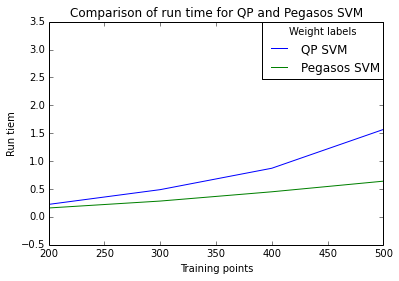

In [296]:
# Plot for the run time
elapsedTimeSVM = elapsedTime
elapsedTimePegasos = [0.15988683700561523, 0.28389906883239746, 0.4499950408935547, 0.6402771472930908]

plt.plot(dataSamples,elapsedTimeSVM,label ='QP SVM' )
plt.plot(dataSamples,elapsedTimePegasos,label = 'Pegasos SVM')
plt.xlabel('Training points')
plt.ylabel('Run tiem')
plt.ylim(-0.5,3.5)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.,title = "Weight labels")
plt.title('Comparison of run time for QP and Pegasos SVM')
pl.savefig('../ImageFiles/HW2/Q4_3Runtime.pdf')



In [ ]:
SVM = SVMclassification(1,1,"linear") # C has been set to 1
bias = SVM.SVMbias(Set1_train_X,Set1_train_Y)
SV,SVlabel,SVMult = SVM.SVMClassifier(Set1_train_X,Set1_train_Y)
predictorBase = SVMPrediction(bias,SVMult,SV,SVlabel)

pred2 = predictorBase.predictSVM(Set1_test_X)

print ClassError(pred2,Set1_test_Y)/np.float(len(Set1_test_Y))

In [320]:
logicList = Set1_test_Y!=pred2
print [i for i, x in enumerate(logicList) if x]
print Set1_test_Y[43]
print pred2[43]
print Set1_test_Y[175]
print pred2[175]
print Set1_test_Y[271]
print pred2[271]

[43, 175, 271]
1.0
-1.0
1.0
-1.0
1.0
-1.0


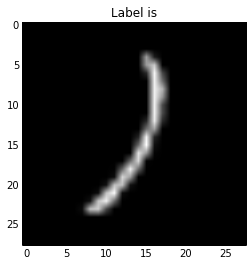

In [324]:
# Visualizing the misclassified digits
pixels1 = np.array(Set1_test_X[43,], dtype='uint8')

#Reshape the array into 28 x 28 array (2-dimensional array)
pixels1 = pixels1.reshape((28, 28))

pixels2 = np.array(Set1_test_X[175,], dtype='uint8')

#Reshape the array into 28 x 28 array (2-dimensional array)
pixels2 = pixels2.reshape((28, 28))

pixels3 = np.array(Set1_test_X[271,], dtype='uint8')

#Reshape the array into 28 x 28 array (2-dimensional array)
pixels3 = pixels3.reshape((28, 28))
# Plot
plt.title('Label is')
plt.imshow(pixels1, cmap='gray')
plt.show()

[None, None, None, None, None, None, None, None]

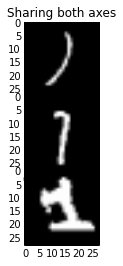

In [329]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = pl.subplots(3)
ax1.imshow(pixels1, cmap='gray')
ax1.set_title('Sharing both axes')
ax2.imshow(pixels2, cmap='gray')
ax3.imshow(pixels3, cmap='gray')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but the bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:1]], visible=False)

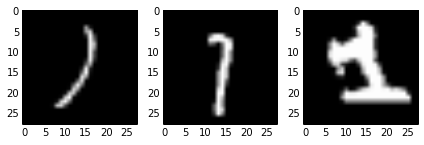

In [337]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.imshow(pixels1, cmap='gray')
ax2.imshow(pixels2, cmap='gray')
ax3.imshow(pixels3, cmap='gray')

plt.tight_layout()
pl.savefig('../ImageFiles/HW2/Q4_1_Misclassified_as_7.pdf')